# AI-enabled Children Story Telling Market Research



In [1]:
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

import tinytroupe
from tinytroupe import config_manager
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.factory import TinyPersonFactory
from tinytroupe.validation import TinyPersonValidator
from tinytroupe import control

from tinytroupe.extraction import ResultsExtractor
from tinytroupe.profiling import Profiler

from tinytroupe.validation import SimulationExperimentEmpiricalValidator, SimulationExperimentDataset, validate_simulation_experiment_empirically


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: c:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\repos\TinyTroupe\examples\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2025-09-18 11:14:57
Current date and time (UTC):   2025-09-18 14:14:57

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_completion_tokens = 32000
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_name = openai_api_cache.pickle
max_content_display_l

In [2]:
config_manager.update("action_generator_enable_quality_checks", True)
config_manager.update("action_generator_quality_threshold", 6)

First of all, we'll use a cached simulation, to avoid having to recompute expensive steps unless really necessary. We accomplish this via the `control.begin()` function. The file it takes as an argument is the cache file that will be created and then updated as needed.

**Tip:** the ".cache." naming convention is used to indicate that the file is a cache file and will not be committed to the repository.

In [3]:
control.begin("ai_enabled_children_story_telling_2.cache.json")

## Prepare the survey and auxiliary elements

Main target nationality and population size.

In [ ]:
population_size = 50

demographic_specification = f"""
A uniformly random representative sample of American parents with children aged 4 to 5 years old, who enjoy reading books.
Must reflect the true distribution of characteristics found in such a sample, making it as realistic as possible.
That is to say, the sample must contain the real people found in the population, not the people we would like to.
"""

context = "Market research for a new product."
  

Descriptions and standard questions for the survey.

In [6]:
interviewer_introduction =\
    """
   Artificial Intelligence (AI) can now create compelling stories for young children, tell them aloud and 
   even generate illustrations of the scenes, like a regular book. We are considering creating a "digital story-teller" to leverage 
   this, and would like the opinion of parents. The key idea is that that the child would be able to independently talk to the AI 
   story-teller and request specific stories, anything the child can imagine. Our main doubt is HOW to deliver this technology to 
   the children.
   
   Your task is to order the options based on your preferences. The first option is the one you like the most, and the last option 
   is the one you like the least. So, for example, if you respond with "B, A, C, D, E", it means you prefer option B the most and 
   option E the least.
    """

interviewer_main_question =\
    """ 
    So the main question for you to rank the options is this: what kind of AI-enabled story-telling device would you buy for your very young children (3 to 5 y.o.)? 
    
    Pick from the options below (A, B, C, D, E) and please explain your choices. Here are the details about each option:


     - (A) DEDICATED SINGLE-PURPOSE DEVICE (AUDIO + IMAGES): A single-purpose portable device, where there are no apps or anything else. There is just a single button to turn it ON or OFF, plus a screen, and when ON the child can talk to an animated story-teller, ask stories and the device then tells the requested stories aloud, including related story illustrations too shown on a screen, all on demand. The child can interrupt it at any time too. There is nothing else, no other apps, no other info, nothing, it is just a story-teller device. The stories are told aloud and include static images (like a book, but on the screen). No parent supervision needed.
           PRICE:  Would cost the same as a regular low-end smartphone or tablet.

     - (B) NOTHING: I would rather NOT use ANY AI-enabled device or app for story-telling to my children.

     - (C) APP FOR YOUR EXISTING PHONE OR TABLET (AUDIO + IMAGES): An app for your existing smartphone or tablet, which the child can open any time, and then interact by voice with an animated storyteller. The child can talk to the app, ask for stories and then the stories are told aloud and include related story illustrations (like a book, but on the screen). The child can interrupt it at any time too. No parent supervision needed while using the app.
           PRICE: Would cost the same as any cheap app (US$ 10).

     - (D) DEDICATED SINGLE-PURPOSE DEVICE (AUDIO-ONLY): A single-purpose portable device, where there are no apps or anything else. There is just a single button to turn it ON or OFF, no screens, and when ON the child can talk to it, ask stories and the device then tells the requested stories aloud (no images) on demand. The child can interrupt it at any time too. There is nothing else, no other apps, no other info, nothing,  it is just a story-teller device. The stories are told aloud and have no images or videos - there's just a soft LED light to indicate whether the device is ON or OFF. No parent supervision needed
           PRICE:  Would cost the same as a regular low-end smartphone or tablet.

     - (E) APP FOR YOUR EXISTING PHONE OR TABLET (AUDIO-ONLY): An app for your existing smartphone or tablet, which the child can open any time, and then interact by voice. The child can talk to the app, ask for stories and then the stories would be told aloud on demand, no images nor videos though. The child can interrupt it at any time too. No parent supervision needed while using the app.
           PRICE: Would cost the same as any cheap app (US$ 10).

   IMPORTANT: Please respond with a list of single letter options (A, B, C, D, E), ordered according to your preferences. After that, you can 
   justify your choice. For example:
  
      "Ranking: B, D, C, A, E. Justification: ..."
   """

inner_monologue =\
    """
    I will be honest as I understand they are not here to judge me, but just to learn from me. 
    Such choices depend on many factors, but I will make my best guess, considering my current 
    situation in life, location, job and interests.

    Now I **must** first THINK deeply about the question, consider all the factors that might influence my decision,
    and only then I will TALK with my response to the question as best, as detailed and as honestly as I can.

    I will respect the expected response format, giving first my ranked choices and then justifying that ranking. I MUST adhere to the format strictly,
    saying "Ranking: ..." and "Justification: ...", otherwise my answer might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).
    """

Common mechaniss.

In [7]:
results_extractor = ResultsExtractor(extraction_objective="Find the preference order for the options given to the customer." ,
                                     situation="Agent was presented with a few product options and then order them according to his/her preference.", 
                                     fields=["name", "response", "justification"],
                                     fields_hints={"response": "Must be a string formatted exactly as 'OPTION_1-OPTION_2-...-OPTION_N' or 'N/A'(if there is no response or you cannot determine the precise response)."},
                                     verbose=True)

## Build the audience

Summon an audience out of thin simulated air. To do so, we build a factory whose context defines our problem and target audience. Actual agents will be later sampled from this factory.

In [ ]:
factory = TinyPersonFactory(
            context=context,
            sampling_space_description=demographic_specification,
            total_population_size=population_size,
        )

In [9]:
people = factory.generate_people(population_size, verbose=True)

2025-09-18 11:15:50,902 - tinytroupe - INFO - Sampling dimensions computed successfully.
2025-09-18 11:15:50,908 - tinytroupe - INFO - Sampling plan computed successfully.
2025-09-18 11:15:50,918 - tinytroupe - WARNING - Expected 50 samples, but got 52 samples. The LLM may have failed to sum up the quantities in the sampling plan correctly.
2025-09-18 11:15:50,921 - tinytroupe - INFO - Sample plan has been flattened, contains 52 total samples.
2025-09-18 11:15:50,940 - tinytroupe - INFO - Names generated for all samples in the sampling plan.
2025-09-18 11:15:50,952 - tinytroupe - INFO - Generating person with the following particularities: 
                    - Name, demographics and other characteristics:
                         {
    "age": [
        28,
        40
    ],
    "gender": [
        "Female",
        "Male"
    ],
    "race_and_ethnicity": [
        "Black or African American"
    ],
    "cultural_background": [
        "A Black/African American family typically rooted

In [10]:
factory.sampling_dimensions

{'sampling_space_description': 'USA population restricted to individuals who like reading books and who are parents with at least one child aged 4 to 5 years old. The sampling space combines the provided demographic proportions with additional fine-grained attributes so samples can be richly varied.',
 'dimensions': [{'name': 'age', 'range': [18, 60]},
  {'name': 'gender', 'values': {'Male': 0.492, 'Female': 0.508}},
  {'name': 'race_and_ethnicity',
   'values': {'White (Non-Hispanic)': 0.571,
    'Hispanic or Latino': 0.194,
    'Black or African American': 0.121,
    'Asian': 0.07,
    'Two or More Races': 0.029,
    'American Indian or Alaska Native': 0.013,
    'Native Hawaiian or Pacific Islander': 0.002}},
  {'name': 'cultural_background',
   'values': {'A multigenerational White non-Hispanic family from the Midwest with deep local roots, often practicing regional cultural traditions, church involvement, and multi-generational social networks.': 0.35,
    'A White urban professio

In [11]:
factory.sampling_plan

[{'id': 1,
  'subpopulation_description': 'Midwestern multigenerational White non-Hispanic parents who prioritize local traditions and reading with children.',
  'sampled_values': {'age': [30, 40],
   'gender': ['Female', 'Male'],
   'race_and_ethnicity': ['White (Non-Hispanic)'],
   'cultural_background': ['A multigenerational White non-Hispanic family from the Midwest with deep local roots, often practicing regional cultural traditions, church involvement, and multi-generational social networks.'],
   'education_attainment': ["High school graduate (no bachelor's degree)",
    "Bachelor's degree or higher"],
   'household_income': ['$50,000-$99,999', '$100,000-$199,999'],
   'geography': ['Midwest', 'Urban'],
   'marital_status': 'Married',
   'employment_status': ['Employed full-time in a wide range of sectors (professional, technical, service, manual labor); employment choices reflect the occupations and wage levels in the population.'],
   'number_of_children_at_home': ['Single chi

We can request a specific number of people.

A quick look into the folks that were created:

In [12]:
factory.generated_minibios

["Claire Elizabeth Martin is a 36 year old Elementary School Teacher (Kindergarten/1st Grade split), American, currently living in Madison, Wisconsin (urban neighborhood, near a mid-sized public park). Warm, organized, and quietly energetic, Claire leans on routines and small caregiving rituals—she keeps a color‑coded family calendar, tucks stray hair behind her ear when concentrating, and often sings short songs or kneels to meet children at eye level to help them feel secure. She is an avid reader and baker who treasures children's literature, makes her grandmother's apple pie every Thanksgiving, tends a small porch herb garden, and organizes neighborhood traditions like a cookie exchange and book drives. Modestly ambitious and practical, she mentors student teachers, serves on a literacy committee, and hopes to move into an instructional‑leadership role while preserving work–life balance, family rituals, and a solid emergency fund. Conscientious and tech‑comfortable, she uses Google

c:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\profiling.py:356: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


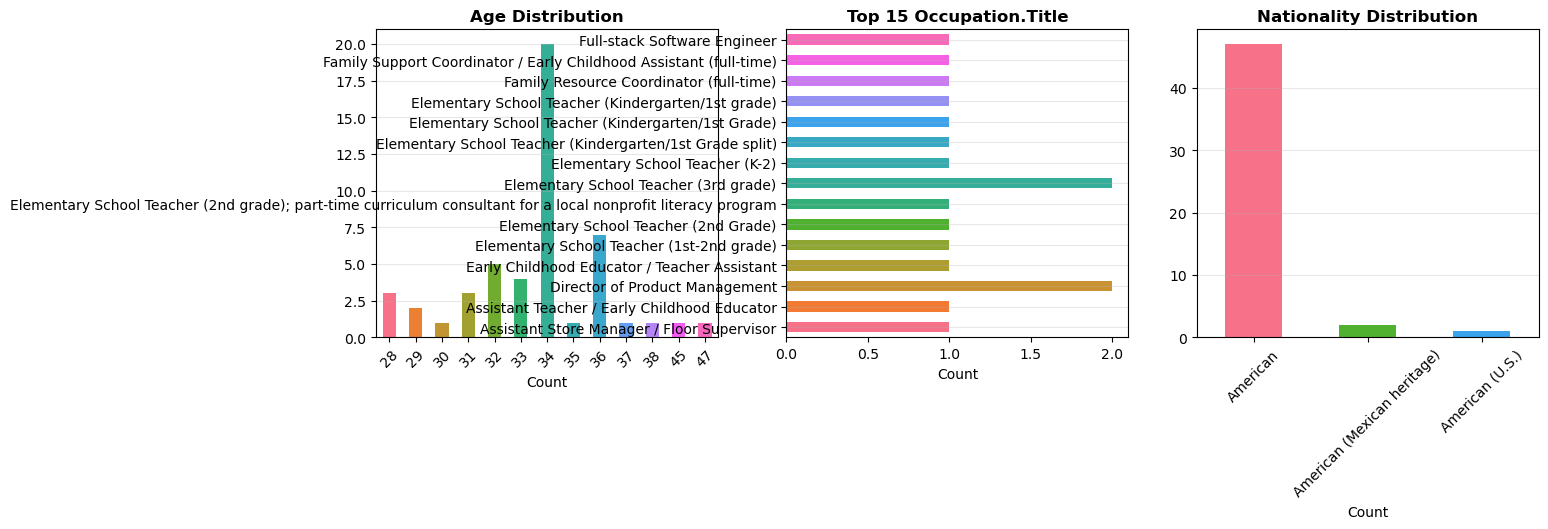

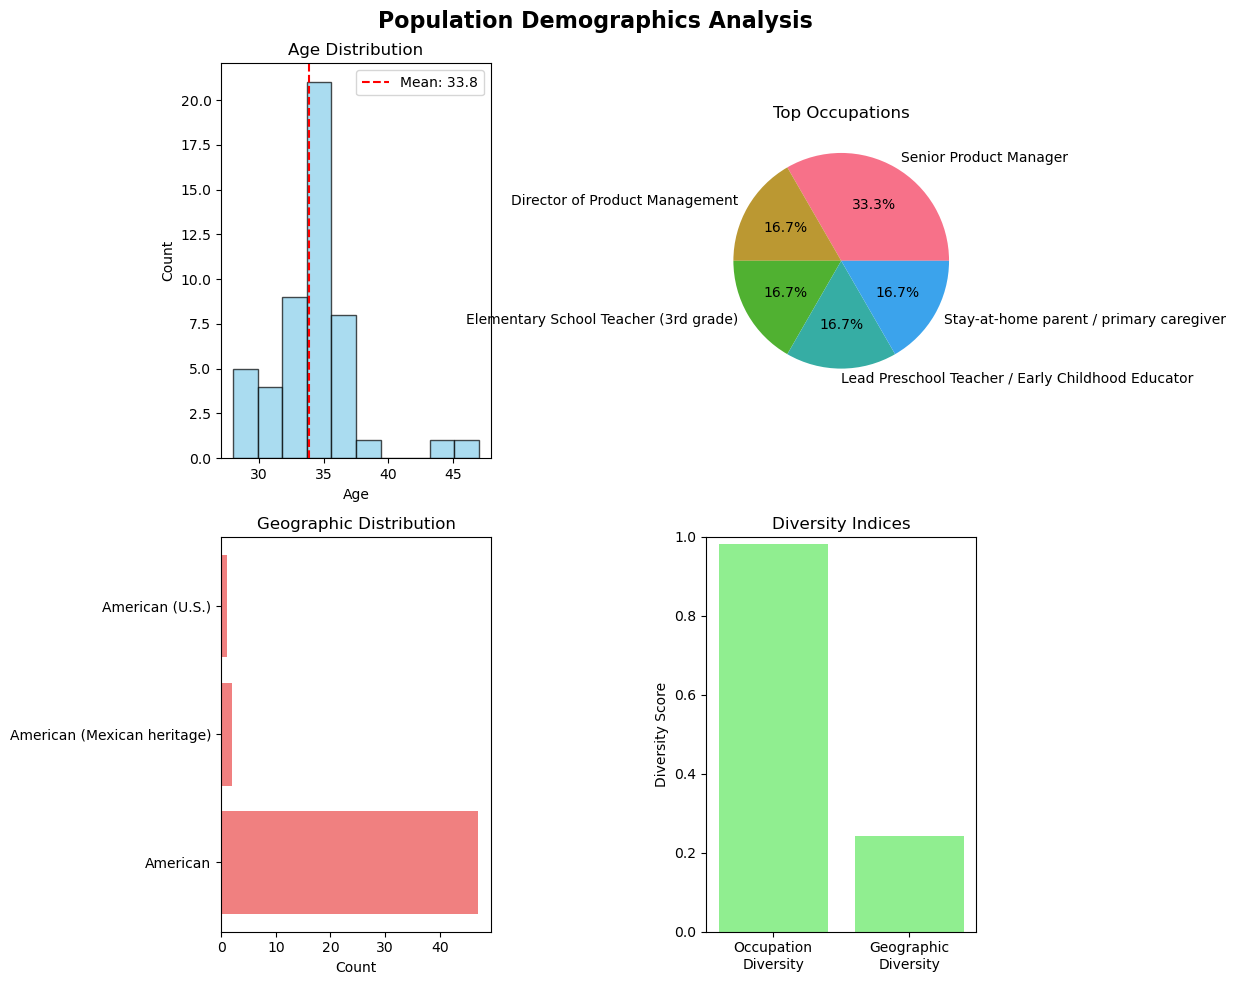

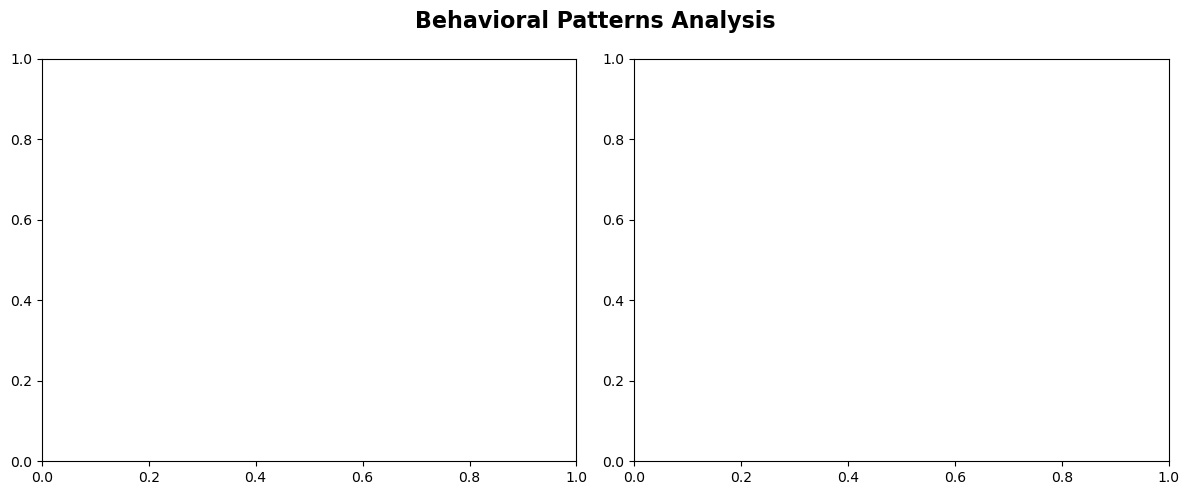

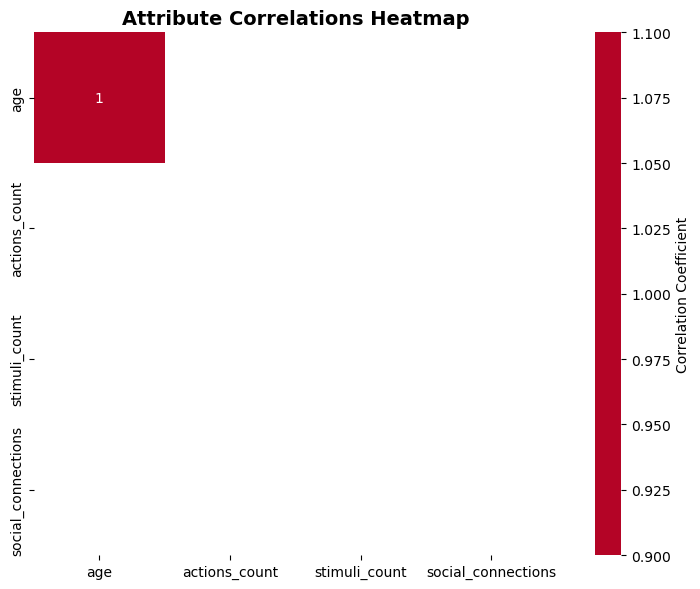

{'distributions': {'age': 28     3
  29     2
  30     1
  31     3
  32     5
  33     4
  34    20
  35     1
  36     7
  37     1
  38     1
  45     1
  47     1
  Name: count, dtype: int64,
  'occupation.title': Assistant Store Manager / Floor Supervisor                                                                       1
  Assistant Teacher / Early Childhood Educator                                                                     1
  Director of Product Management                                                                                   2
  Early Childhood Educator / Teacher Assistant                                                                     1
  Elementary School Teacher (1st-2nd grade)                                                                        1
  Elementary School Teacher (2nd Grade)                                                                            1
  Elementary School Teacher (2nd grade); part-time curriculum consultant for a loc

In [13]:
profiler = Profiler()
profiler.profile(people)

Checkpoint the simulation state to disk, to avoid having to re-run the expensive agent sampling process, unless really necessary.

In [14]:
control.checkpoint()

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [ ]:
market = TinyWorld(f"Target audience", people, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [16]:
market.broadcast(interviewer_introduction)
market.broadcast(interviewer_main_question)
market.broadcast_thought(inner_monologue)

USER --> Caitlin Emerson Price: [CONVERSATION] 
          >     Artificial Intelligence (AI) can now create compelling stories for young children,
          > tell them aloud and     even generate illustrations of the scenes, like a regular book.
          > We are considering creating a "digital story-teller" to leverage     this, and would
          > like the opinion of parents. The key idea is that that the child would be able to
          > independently talk to the AI     story-teller and request specific stories, anything the
          > child can imagine. Our main doubt is HOW to deliver this technology to     the children.
          > Your task is to order the options based on your preferences. The first option is the one
          > you like the most, and the last option     is the one you like the least. So, for
          > example, if you respond with "B, A, C, D, E", it means you prefer option B the most and
          > option E the least.

       + --> Camila Elena Torres

       + --> Heather Lynn Montgomery

       + --> ...others...

USER --> Caitlin Emerson Price: [CONVERSATION] 
          >       So the main question for you to rank the options is this: what kind of AI-enabled
          > story-telling device would you buy for your very young children (3 to 5 y.o.)?
          > Pick from the options below (A, B, C, D, E) and please explain your choices. Here are
          > the details about each option:        - (A) DEDICATED SINGLE-PURPOSE DEVICE (AUDIO +
          > IMAGES): A single-purpose portable device, where there are no apps or anything else.
          > There is just a single button to turn it ON or OFF, plus a screen, and when ON the child
          > can talk to an animated story-teller, ask stories and the device then tells the
          > requested stories aloud, including related story illustrations too shown on a screen,
          > all on demand. The child can interrupt it at any time too. There is nothing else, no
          > other apps, no other info, nothing, it is just a story-teller device. The stories are
          > told aloud and include static images (like a book, but on the screen). No parent
          > supervision needed.            PRICE:  Would cost the same as a regular low-end smar
          > (...)

       + --> Camila Elena Torres

       + --> Heather Lynn Montgomery

       + --> ...others...

Caitlin Emerson Price --> Caitlin Emerson Price: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Camila Elena Torres --> Camila Elena Torres: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Heather Lynn Montgomery --> Heather Lynn Montgomery: [THOUGHT] 
                             >      I will be honest as I understand they are not here to judge me,
                             > but just to learn from me.      Such choices depend on many factors,
                             > but I will make my best guess, considering my current      situation
                             > in life, location, job and interests.      Now I **must** first THINK
                             > deeply about the question, consider all the factors that might
                             > influence my decision,     and only then I will TALK with my response
                             > to the question as best, as detailed and as honestly as I can.      I
                             > will respect the expected response format, giving first my ranked
                             > choices and then justifying that ranking. I MUST adhere to the format
                             > strictly,     saying "Ranking: ..." and "Justification: ...",
                             > otherwise my answer might be discarded. For the choices, I WILL USE
                             > LETTERS (A, B, C, D, E).

Olivia Kate Reynolds --> Olivia Kate Reynolds: [THOUGHT] 
                          >      I will be honest as I understand they are not here to judge me, but
                          > just to learn from me.      Such choices depend on many factors, but I
                          > will make my best guess, considering my current      situation in life,
                          > location, job and interests.      Now I **must** first THINK deeply
                          > about the question, consider all the factors that might influence my
                          > decision,     and only then I will TALK with my response to the question
                          > as best, as detailed and as honestly as I can.      I will respect the
                          > expected response format, giving first my ranked choices and then
                          > justifying that ranking. I MUST adhere to the format strictly,
                          > saying "Ranking: ..." and "Justification: ...", otherwise my answer
                          > might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Caroline Elise Hart --> Caroline Elise Hart: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Alejandra Maribel Hernandez --> Alejandra Maribel Hernandez: [THOUGHT] 
                                 >      I will be honest as I understand they are not here to judge
                                 > me, but just to learn from me.      Such choices depend on many
                                 > factors, but I will make my best guess, considering my current
                                 > situation in life, location, job and interests.      Now I
                                 > **must** first THINK deeply about the question, consider all the
                                 > factors that might influence my decision,     and only then I
                                 > will TALK with my response to the question as best, as detailed
                                 > and as honestly as I can.      I will respect the expected
                                 > response format, giving first my ranked choices and then
                                 > justifying that ranking. I MUST adhere to the format strictly,
                                 > saying "Ranking: ..." and "Justification: ...", otherwise my
                                 > answer might be discarded. For the choices, I WILL USE LETTERS
                                 > (A, B, C, D, E).

Leah Mariko Alvarez-Green --> Leah Mariko Alvarez-Green: [THOUGHT] 
                               >      I will be honest as I understand they are not here to judge
                               > me, but just to learn from me.      Such choices depend on many
                               > factors, but I will make my best guess, considering my current
                               > situation in life, location, job and interests.      Now I **must**
                               > first THINK deeply about the question, consider all the factors
                               > that might influence my decision,     and only then I will TALK
                               > with my response to the question as best, as detailed and as
                               > honestly as I can.      I will respect the expected response
                               > format, giving first my ranked choices and then justifying that
                               > ranking. I MUST adhere to the format strictly,     saying "Ranking:
                               > ..." and "Justification: ...", otherwise my answer might be
                               > discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Lucia Elena Martinez --> Lucia Elena Martinez: [THOUGHT] 
                          >      I will be honest as I understand they are not here to judge me, but
                          > just to learn from me.      Such choices depend on many factors, but I
                          > will make my best guess, considering my current      situation in life,
                          > location, job and interests.      Now I **must** first THINK deeply
                          > about the question, consider all the factors that might influence my
                          > decision,     and only then I will TALK with my response to the question
                          > as best, as detailed and as honestly as I can.      I will respect the
                          > expected response format, giving first my ranked choices and then
                          > justifying that ranking. I MUST adhere to the format strictly,
                          > saying "Ranking: ..." and "Justification: ...", otherwise my answer
                          > might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Jasmine Patrice Carter --> Jasmine Patrice Carter: [THOUGHT] 
                            >      I will be honest as I understand they are not here to judge me,
                            > but just to learn from me.      Such choices depend on many factors,
                            > but I will make my best guess, considering my current      situation
                            > in life, location, job and interests.      Now I **must** first THINK
                            > deeply about the question, consider all the factors that might
                            > influence my decision,     and only then I will TALK with my response
                            > to the question as best, as detailed and as honestly as I can.      I
                            > will respect the expected response format, giving first my ranked
                            > choices and then justifying that ranking. I MUST adhere to the format
                            > strictly,     saying "Ranking: ..." and "Justification: ...",
                            > otherwise my answer might be discarded. For the choices, I WILL USE
                            > LETTERS (A, B, C, D, E).

Ava Mei Lin --> Ava Mei Lin: [THOUGHT] 
                 >      I will be honest as I understand they are not here to judge me, but just to
                 > learn from me.      Such choices depend on many factors, but I will make my best
                 > guess, considering my current      situation in life, location, job and
                 > interests.      Now I **must** first THINK deeply about the question, consider
                 > all the factors that might influence my decision,     and only then I will TALK
                 > with my response to the question as best, as detailed and as honestly as I can.
                 > I will respect the expected response format, giving first my ranked choices and
                 > then justifying that ranking. I MUST adhere to the format strictly,     saying
                 > "Ranking: ..." and "Justification: ...", otherwise my answer might be discarded.
                 > For the choices, I WILL USE LETTERS (A, B, C, D, E).

Evan Thomas Harper --> Evan Thomas Harper: [THOUGHT] 
                        >      I will be honest as I understand they are not here to judge me, but
                        > just to learn from me.      Such choices depend on many factors, but I
                        > will make my best guess, considering my current      situation in life,
                        > location, job and interests.      Now I **must** first THINK deeply about
                        > the question, consider all the factors that might influence my decision,
                        > and only then I will TALK with my response to the question as best, as
                        > detailed and as honestly as I can.      I will respect the expected
                        > response format, giving first my ranked choices and then justifying that
                        > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                        > and "Justification: ...", otherwise my answer might be discarded. For the
                        > choices, I WILL USE LETTERS (A, B, C, D, E).

Claire Elizabeth Martin --> Claire Elizabeth Martin: [THOUGHT] 
                             >      I will be honest as I understand they are not here to judge me,
                             > but just to learn from me.      Such choices depend on many factors,
                             > but I will make my best guess, considering my current      situation
                             > in life, location, job and interests.      Now I **must** first THINK
                             > deeply about the question, consider all the factors that might
                             > influence my decision,     and only then I will TALK with my response
                             > to the question as best, as detailed and as honestly as I can.      I
                             > will respect the expected response format, giving first my ranked
                             > choices and then justifying that ranking. I MUST adhere to the format
                             > strictly,     saying "Ranking: ..." and "Justification: ...",
                             > otherwise my answer might be discarded. For the choices, I WILL USE
                             > LETTERS (A, B, C, D, E).

Natalia Brooks --> Natalia Brooks: [THOUGHT] 
                    >      I will be honest as I understand they are not here to judge me, but just
                    > to learn from me.      Such choices depend on many factors, but I will make my
                    > best guess, considering my current      situation in life, location, job and
                    > interests.      Now I **must** first THINK deeply about the question, consider
                    > all the factors that might influence my decision,     and only then I will
                    > TALK with my response to the question as best, as detailed and as honestly as
                    > I can.      I will respect the expected response format, giving first my
                    > ranked choices and then justifying that ranking. I MUST adhere to the format
                    > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise my
                    > answer might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D,
                    > E).

Molly Grace Whitman --> Molly Grace Whitman: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Ashley Marie Collins --> Ashley Marie Collins: [THOUGHT] 
                          >      I will be honest as I understand they are not here to judge me, but
                          > just to learn from me.      Such choices depend on many factors, but I
                          > will make my best guess, considering my current      situation in life,
                          > location, job and interests.      Now I **must** first THINK deeply
                          > about the question, consider all the factors that might influence my
                          > decision,     and only then I will TALK with my response to the question
                          > as best, as detailed and as honestly as I can.      I will respect the
                          > expected response format, giving first my ranked choices and then
                          > justifying that ranking. I MUST adhere to the format strictly,
                          > saying "Ranking: ..." and "Justification: ...", otherwise my answer
                          > might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Ananya Kapoor --> Ananya Kapoor: [THOUGHT] 
                   >      I will be honest as I understand they are not here to judge me, but just
                   > to learn from me.      Such choices depend on many factors, but I will make my
                   > best guess, considering my current      situation in life, location, job and
                   > interests.      Now I **must** first THINK deeply about the question, consider
                   > all the factors that might influence my decision,     and only then I will TALK
                   > with my response to the question as best, as detailed and as honestly as I can.
                   > I will respect the expected response format, giving first my ranked choices and
                   > then justifying that ranking. I MUST adhere to the format strictly,     saying
                   > "Ranking: ..." and "Justification: ...", otherwise my answer might be
                   > discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Abigail Meredith Coleman --> Abigail Meredith Coleman: [THOUGHT] 
                              >      I will be honest as I understand they are not here to judge me,
                              > but just to learn from me.      Such choices depend on many factors,
                              > but I will make my best guess, considering my current      situation
                              > in life, location, job and interests.      Now I **must** first
                              > THINK deeply about the question, consider all the factors that might
                              > influence my decision,     and only then I will TALK with my
                              > response to the question as best, as detailed and as honestly as I
                              > can.      I will respect the expected response format, giving first
                              > my ranked choices and then justifying that ranking. I MUST adhere to
                              > the format strictly,     saying "Ranking: ..." and "Justification:
                              > ...", otherwise my answer might be discarded. For the choices, I
                              > WILL USE LETTERS (A, B, C, D, E).

Margot Emerson Clarke --> Margot Emerson Clarke: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Jennifer Marie Brooks --> Jennifer Marie Brooks: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Holly Margaret Greene --> Holly Margaret Greene: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Rebecca Wallace --> Rebecca Wallace: [THOUGHT] 
                     >      I will be honest as I understand they are not here to judge me, but just
                     > to learn from me.      Such choices depend on many factors, but I will make
                     > my best guess, considering my current      situation in life, location, job
                     > and interests.      Now I **must** first THINK deeply about the question,
                     > consider all the factors that might influence my decision,     and only then
                     > I will TALK with my response to the question as best, as detailed and as
                     > honestly as I can.      I will respect the expected response format, giving
                     > first my ranked choices and then justifying that ranking. I MUST adhere to
                     > the format strictly,     saying "Ranking: ..." and "Justification: ...",
                     > otherwise my answer might be discarded. For the choices, I WILL USE LETTERS
                     > (A, B, C, D, E).

Maya Linh Torres-Khan --> Maya Linh Torres-Khan: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Hannah Mei Walker --> Hannah Mei Walker: [THOUGHT] 
                       >      I will be honest as I understand they are not here to judge me, but
                       > just to learn from me.      Such choices depend on many factors, but I will
                       > make my best guess, considering my current      situation in life,
                       > location, job and interests.      Now I **must** first THINK deeply about
                       > the question, consider all the factors that might influence my decision,
                       > and only then I will TALK with my response to the question as best, as
                       > detailed and as honestly as I can.      I will respect the expected
                       > response format, giving first my ranked choices and then justifying that
                       > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                       > and "Justification: ...", otherwise my answer might be discarded. For the
                       > choices, I WILL USE LETTERS (A, B, C, D, E).

Evelyn Jia Chen --> Evelyn Jia Chen: [THOUGHT] 
                     >      I will be honest as I understand they are not here to judge me, but just
                     > to learn from me.      Such choices depend on many factors, but I will make
                     > my best guess, considering my current      situation in life, location, job
                     > and interests.      Now I **must** first THINK deeply about the question,
                     > consider all the factors that might influence my decision,     and only then
                     > I will TALK with my response to the question as best, as detailed and as
                     > honestly as I can.      I will respect the expected response format, giving
                     > first my ranked choices and then justifying that ranking. I MUST adhere to
                     > the format strictly,     saying "Ranking: ..." and "Justification: ...",
                     > otherwise my answer might be discarded. For the choices, I WILL USE LETTERS
                     > (A, B, C, D, E).

Erin Katherine Miller --> Erin Katherine Miller: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Aisha Nicole Thompson --> Aisha Nicole Thompson: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Jessica Marie Little --> Jessica Marie Little: [THOUGHT] 
                          >      I will be honest as I understand they are not here to judge me, but
                          > just to learn from me.      Such choices depend on many factors, but I
                          > will make my best guess, considering my current      situation in life,
                          > location, job and interests.      Now I **must** first THINK deeply
                          > about the question, consider all the factors that might influence my
                          > decision,     and only then I will TALK with my response to the question
                          > as best, as detailed and as honestly as I can.      I will respect the
                          > expected response format, giving first my ranked choices and then
                          > justifying that ranking. I MUST adhere to the format strictly,
                          > saying "Ranking: ..." and "Justification: ...", otherwise my answer
                          > might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Leilani Yazzie --> Leilani Yazzie: [THOUGHT] 
                    >      I will be honest as I understand they are not here to judge me, but just
                    > to learn from me.      Such choices depend on many factors, but I will make my
                    > best guess, considering my current      situation in life, location, job and
                    > interests.      Now I **must** first THINK deeply about the question, consider
                    > all the factors that might influence my decision,     and only then I will
                    > TALK with my response to the question as best, as detailed and as honestly as
                    > I can.      I will respect the expected response format, giving first my
                    > ranked choices and then justifying that ranking. I MUST adhere to the format
                    > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise my
                    > answer might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D,
                    > E).

Sofia Elena Morales --> Sofia Elena Morales: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Natalie Grace Anderson --> Natalie Grace Anderson: [THOUGHT] 
                            >      I will be honest as I understand they are not here to judge me,
                            > but just to learn from me.      Such choices depend on many factors,
                            > but I will make my best guess, considering my current      situation
                            > in life, location, job and interests.      Now I **must** first THINK
                            > deeply about the question, consider all the factors that might
                            > influence my decision,     and only then I will TALK with my response
                            > to the question as best, as detailed and as honestly as I can.      I
                            > will respect the expected response format, giving first my ranked
                            > choices and then justifying that ranking. I MUST adhere to the format
                            > strictly,     saying "Ranking: ..." and "Justification: ...",
                            > otherwise my answer might be discarded. For the choices, I WILL USE
                            > LETTERS (A, B, C, D, E).

Dominique Latrice Johnson --> Dominique Latrice Johnson: [THOUGHT] 
                               >      I will be honest as I understand they are not here to judge
                               > me, but just to learn from me.      Such choices depend on many
                               > factors, but I will make my best guess, considering my current
                               > situation in life, location, job and interests.      Now I **must**
                               > first THINK deeply about the question, consider all the factors
                               > that might influence my decision,     and only then I will TALK
                               > with my response to the question as best, as detailed and as
                               > honestly as I can.      I will respect the expected response
                               > format, giving first my ranked choices and then justifying that
                               > ranking. I MUST adhere to the format strictly,     saying "Ranking:
                               > ..." and "Justification: ...", otherwise my answer might be
                               > discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Maya Rivera-Johnson --> Maya Rivera-Johnson: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Kendra Patrice Williams --> Kendra Patrice Williams: [THOUGHT] 
                             >      I will be honest as I understand they are not here to judge me,
                             > but just to learn from me.      Such choices depend on many factors,
                             > but I will make my best guess, considering my current      situation
                             > in life, location, job and interests.      Now I **must** first THINK
                             > deeply about the question, consider all the factors that might
                             > influence my decision,     and only then I will TALK with my response
                             > to the question as best, as detailed and as honestly as I can.      I
                             > will respect the expected response format, giving first my ranked
                             > choices and then justifying that ranking. I MUST adhere to the format
                             > strictly,     saying "Ranking: ..." and "Justification: ...",
                             > otherwise my answer might be discarded. For the choices, I WILL USE
                             > LETTERS (A, B, C, D, E).

Caroline Reid Whitman --> Caroline Reid Whitman: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Monique Danielle Harris --> Monique Danielle Harris: [THOUGHT] 
                             >      I will be honest as I understand they are not here to judge me,
                             > but just to learn from me.      Such choices depend on many factors,
                             > but I will make my best guess, considering my current      situation
                             > in life, location, job and interests.      Now I **must** first THINK
                             > deeply about the question, consider all the factors that might
                             > influence my decision,     and only then I will TALK with my response
                             > to the question as best, as detailed and as honestly as I can.      I
                             > will respect the expected response format, giving first my ranked
                             > choices and then justifying that ranking. I MUST adhere to the format
                             > strictly,     saying "Ranking: ..." and "Justification: ...",
                             > otherwise my answer might be discarded. For the choices, I WILL USE
                             > LETTERS (A, B, C, D, E).

Sarah Lynn Daniels --> Sarah Lynn Daniels: [THOUGHT] 
                        >      I will be honest as I understand they are not here to judge me, but
                        > just to learn from me.      Such choices depend on many factors, but I
                        > will make my best guess, considering my current      situation in life,
                        > location, job and interests.      Now I **must** first THINK deeply about
                        > the question, consider all the factors that might influence my decision,
                        > and only then I will TALK with my response to the question as best, as
                        > detailed and as honestly as I can.      I will respect the expected
                        > response format, giving first my ranked choices and then justifying that
                        > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                        > and "Justification: ...", otherwise my answer might be discarded. For the
                        > choices, I WILL USE LETTERS (A, B, C, D, E).

Rachel Morgan Ellis --> Rachel Morgan Ellis: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Brianna Lopez-Jones --> Brianna Lopez-Jones: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Claire Montgomery --> Claire Montgomery: [THOUGHT] 
                       >      I will be honest as I understand they are not here to judge me, but
                       > just to learn from me.      Such choices depend on many factors, but I will
                       > make my best guess, considering my current      situation in life,
                       > location, job and interests.      Now I **must** first THINK deeply about
                       > the question, consider all the factors that might influence my decision,
                       > and only then I will TALK with my response to the question as best, as
                       > detailed and as honestly as I can.      I will respect the expected
                       > response format, giving first my ranked choices and then justifying that
                       > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                       > and "Justification: ...", otherwise my answer might be discarded. For the
                       > choices, I WILL USE LETTERS (A, B, C, D, E).

Hannah Lucia Reynolds --> Hannah Lucia Reynolds: [THOUGHT] 
                           >      I will be honest as I understand they are not here to judge me,
                           > but just to learn from me.      Such choices depend on many factors,
                           > but I will make my best guess, considering my current      situation in
                           > life, location, job and interests.      Now I **must** first THINK
                           > deeply about the question, consider all the factors that might
                           > influence my decision,     and only then I will TALK with my response
                           > to the question as best, as detailed and as honestly as I can.      I
                           > will respect the expected response format, giving first my ranked
                           > choices and then justifying that ranking. I MUST adhere to the format
                           > strictly,     saying "Ranking: ..." and "Justification: ...", otherwise
                           > my answer might be discarded. For the choices, I WILL USE LETTERS (A,
                           > B, C, D, E).

Gabriela Marisol Rivera --> Gabriela Marisol Rivera: [THOUGHT] 
                             >      I will be honest as I understand they are not here to judge me,
                             > but just to learn from me.      Such choices depend on many factors,
                             > but I will make my best guess, considering my current      situation
                             > in life, location, job and interests.      Now I **must** first THINK
                             > deeply about the question, consider all the factors that might
                             > influence my decision,     and only then I will TALK with my response
                             > to the question as best, as detailed and as honestly as I can.      I
                             > will respect the expected response format, giving first my ranked
                             > choices and then justifying that ranking. I MUST adhere to the format
                             > strictly,     saying "Ranking: ..." and "Justification: ...",
                             > otherwise my answer might be discarded. For the choices, I WILL USE
                             > LETTERS (A, B, C, D, E).

Isabel Rosa Castillo --> Isabel Rosa Castillo: [THOUGHT] 
                          >      I will be honest as I understand they are not here to judge me, but
                          > just to learn from me.      Such choices depend on many factors, but I
                          > will make my best guess, considering my current      situation in life,
                          > location, job and interests.      Now I **must** first THINK deeply
                          > about the question, consider all the factors that might influence my
                          > decision,     and only then I will TALK with my response to the question
                          > as best, as detailed and as honestly as I can.      I will respect the
                          > expected response format, giving first my ranked choices and then
                          > justifying that ranking. I MUST adhere to the format strictly,
                          > saying "Ranking: ..." and "Justification: ...", otherwise my answer
                          > might be discarded. For the choices, I WILL USE LETTERS (A, B, C, D, E).

Anika Meera Shah --> Anika Meera Shah: [THOUGHT] 
                      >      I will be honest as I understand they are not here to judge me, but
                      > just to learn from me.      Such choices depend on many factors, but I will
                      > make my best guess, considering my current      situation in life, location,
                      > job and interests.      Now I **must** first THINK deeply about the
                      > question, consider all the factors that might influence my decision,     and
                      > only then I will TALK with my response to the question as best, as detailed
                      > and as honestly as I can.      I will respect the expected response format,
                      > giving first my ranked choices and then justifying that ranking. I MUST
                      > adhere to the format strictly,     saying "Ranking: ..." and "Justification:
                      > ...", otherwise my answer might be discarded. For the choices, I WILL USE
                      > LETTERS (A, B, C, D, E).

Malia Kealoha-Begay --> Malia Kealoha-Begay: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Allison Claire Bennett --> Allison Claire Bennett: [THOUGHT] 
                            >      I will be honest as I understand they are not here to judge me,
                            > but just to learn from me.      Such choices depend on many factors,
                            > but I will make my best guess, considering my current      situation
                            > in life, location, job and interests.      Now I **must** first THINK
                            > deeply about the question, consider all the factors that might
                            > influence my decision,     and only then I will TALK with my response
                            > to the question as best, as detailed and as honestly as I can.      I
                            > will respect the expected response format, giving first my ranked
                            > choices and then justifying that ranking. I MUST adhere to the format
                            > strictly,     saying "Ranking: ..." and "Justification: ...",
                            > otherwise my answer might be discarded. For the choices, I WILL USE
                            > LETTERS (A, B, C, D, E).

Emily Jane Carter --> Emily Jane Carter: [THOUGHT] 
                       >      I will be honest as I understand they are not here to judge me, but
                       > just to learn from me.      Such choices depend on many factors, but I will
                       > make my best guess, considering my current      situation in life,
                       > location, job and interests.      Now I **must** first THINK deeply about
                       > the question, consider all the factors that might influence my decision,
                       > and only then I will TALK with my response to the question as best, as
                       > detailed and as honestly as I can.      I will respect the expected
                       > response format, giving first my ranked choices and then justifying that
                       > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                       > and "Justification: ...", otherwise my answer might be discarded. For the
                       > choices, I WILL USE LETTERS (A, B, C, D, E).

Ana Marie Collins --> Ana Marie Collins: [THOUGHT] 
                       >      I will be honest as I understand they are not here to judge me, but
                       > just to learn from me.      Such choices depend on many factors, but I will
                       > make my best guess, considering my current      situation in life,
                       > location, job and interests.      Now I **must** first THINK deeply about
                       > the question, consider all the factors that might influence my decision,
                       > and only then I will TALK with my response to the question as best, as
                       > detailed and as honestly as I can.      I will respect the expected
                       > response format, giving first my ranked choices and then justifying that
                       > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                       > and "Justification: ...", otherwise my answer might be discarded. For the
                       > choices, I WILL USE LETTERS (A, B, C, D, E).

Megan Elise Hartman --> Megan Elise Hartman: [THOUGHT] 
                         >      I will be honest as I understand they are not here to judge me, but
                         > just to learn from me.      Such choices depend on many factors, but I
                         > will make my best guess, considering my current      situation in life,
                         > location, job and interests.      Now I **must** first THINK deeply about
                         > the question, consider all the factors that might influence my decision,
                         > and only then I will TALK with my response to the question as best, as
                         > detailed and as honestly as I can.      I will respect the expected
                         > response format, giving first my ranked choices and then justifying that
                         > ranking. I MUST adhere to the format strictly,     saying "Ranking: ..."
                         > and "Justification: ...", otherwise my answer might be discarded. For the
                         > choices, I WILL USE LETTERS (A, B, C, D, E).

Mariana Alvarez --> Mariana Alvarez: [THOUGHT] 
                     >      I will be honest as I understand they are not here to judge me, but just
                     > to learn from me.      Such choices depend on many factors, but I will make
                     > my best guess, considering my current      situation in life, location, job
                     > and interests.      Now I **must** first THINK deeply about the question,
                     > consider all the factors that might influence my decision,     and only then
                     > I will TALK with my response to the question as best, as detailed and as
                     > honestly as I can.      I will respect the expected response format, giving
                     > first my ranked choices and then justifying that ranking. I MUST adhere to
                     > the format strictly,     saying "Ranking: ..." and "Justification: ...",
                     > otherwise my answer might be discarded. For the choices, I WILL USE LETTERS
                     > (A, B, C, D, E).

Sasha Nguyen --> Sasha Nguyen: [THOUGHT] 
                  >      I will be honest as I understand they are not here to judge me, but just to
                  > learn from me.      Such choices depend on many factors, but I will make my best
                  > guess, considering my current      situation in life, location, job and
                  > interests.      Now I **must** first THINK deeply about the question, consider
                  > all the factors that might influence my decision,     and only then I will TALK
                  > with my response to the question as best, as detailed and as honestly as I can.
                  > I will respect the expected response format, giving first my ranked choices and
                  > then justifying that ranking. I MUST adhere to the format strictly,     saying
                  > "Ranking: ..." and "Justification: ...", otherwise my answer might be discarded.
                  > For the choices, I WILL USE LETTERS (A, B, C, D, E).

In [17]:
market.run(1)

2025-09-18 11:15:59,343 - tinytroupe - INFO - [Target audience (American)] Running world simulation step 1 of 1.


───────────────────────────────────── Target audience (American) step 1 of 1 ──────────────────────────────────────

2025-09-18 11:15:59,347 - tinytroupe - INFO - [Target audience (American)] No timedelta provided, so the datetime was not advanced.


Camila Elena Torres acts: [THINK] 
                         > Okay, pienso en voz alta: los niños de 3-5 necesitan algo seguro, fácil,
                         > y que no dependa de que yo esté pegada al teléfono todo el tiempo. Me
                         > preocupo por el presupuesto—no puedo gastar mucho—y por la privacidad y
                         > anuncios molestos. También quiero que sea bilingüe o que permita
                         > historias en español, que pueda pausarse cuando hay que cambiar pañales o
                         > atender a otro niño, y que no tenga apps que los distraigan o que los
                         > dejen ver cosas no apropiadas. Prefiero algo robusto, con control
                         > parental sencillo y offline si es posible. Ahora voy a responder en el
                         > formato pedido: ranking primero y luego la justificación clara y breve
                         > para cada opción.

Camila Elena Torres acts: [TALK] 
                         > Ranking: A, D, C, B, E  Justification: A — Dedicated single-purpose
                         > device: Me encanta esta opción para mis niños en la clase y para casa. Es
                         > simple (un botón), no tiene apps ni distracciones, se puede pausar fácil,
                         > y si trae imágenes estáticas es como un libro digital. Es más seguro para
                         > niños pequeños, menos dependiente del Wi‑Fi, y normalmente más barato que
                         > un tablet bueno. Además, como maestra de Early Childhood, valoro que el
                         > dispositivo no reemplace a la maestra pero apoye la lectura
                         > independiente. Por eso A es mi primera elección.  D — (Device/toy with
                         > curated content): Poneo a D en segundo porque si es un juguete pensado
                         > para niños, con contenido curado y controles parentales, puede ser muy
                         > amigable y resistente al uso en la sala. Si tiene voces y algunas
                         > interacciones preprogramadas, entretiene sin abrir la puerta a internet
                         > peligrosa. Lo ubico segundo porque depende de cómo lo implementen—si
                         > tiene menos opciones bilingües o es caro, baja en preferencia.  C —
                         > (Smart speaker/voice assistant): Lo pong (...)

Camila Elena Torres acts: [DONE] 
                         > Finished ranking and justification; waiting for follow-up questions.

Caitlin Emerson Price acts: [THINK] 
                           > I need to be explicit about my reasoning before I speak. Relevant
                           > factors for a 3–5 year old: child safety and privacy (no profiling or
                           > always-on mics if possible), simplicity/usability for independent use,
                           > limited and appropriate screen time, high-quality storytelling
                           > (language, diversity, pacing), parental controls and curation, offline
                           > capability/resilience, price and maintenance, and equity/access (not
                           > requiring an expensive tablet). As a parent and product leader I’ll
                           > weight privacy, developmental appropriateness, and low-friction use
                           > higher than bells-and-whistles personalization. I’ll pick a clear
                           > ranking and then justify each choice succinctly, referencing those
                           > criteria.

Alejandra Maribel Hernandez acts: [THINK] 
                                 > Bueno, pienso en voz baja: tengo que recordar para quién es esto
                                 > —niños de 3 a 5 años— y lo que yo valoro como mamá y como
                                 > maestra: que sea bilingüe (Spanish/English), seguro, fácil de
                                 > usar sin que el niño se pierda en apps, no mucho tiempo de
                                 > pantalla pero sí algo atractivo, y que no cueste una fortuna ni
                                 > tenga suscripciones escondidas. También pienso en la practicidad:
                                 > si se rompe en la mochila del kinder, si lo puede usar solo Sofí
                                 > o necesita siempre supervisión, y si necesita wifi (que a veces
                                 > en casa no es muy fiable). Me pesan la privacidad y que no haya
                                 > cosas extrañas en internet, y prefiero dispositivos dedicados o
                                 > control parental fuerte. Ordenaré opciones según eso y explico
                                 > claro por qué.

Caitlin Emerson Price acts: [TALK] 
                           > Ranking: A, C, D, B, E  Justification: A first — the dedicated single-
                           > purpose device checks most boxes for our family: simple UI a 3–5 yo can
                           > operate, minimal distraction (no other apps), lower risk of data-
                           > harvesting or algorithmic personalization, and it encourages
                           > listening/reading habits rather than endless tapping. It’s also easier
                           > for caregivers to trust and hand to a child without constant
                           > supervision.   C second — assuming C is a curated/parent-managed device
                           > or platform that lets caregivers pick collections and control usage,
                           > that’s a good tradeoff: more flexibility than A but still keeps
                           > curation and safety in adults’ hands.   D third — a supervised app on a
                           > general-purpose tablet can offer excellent content and controls, but it
                           > depends on the tablet environment (notifications, other apps) and
                           > typically increases screen-time risk; it’s a fine option when families
                           > already use a tablet and want richer visuals or interactivity.   B
                           > fourth — voice-assistant–style always-on devices are convenient, but I
                           > (...)

Alejandra Maribel Hernandez acts: [TALK] 
                                 > Ranking: A, C, B, E, D  Justification:  A (Dedicated single-
                                 > purpose device): Primero porque me gusta que sea solo para
                                 > cuentos —sin otras apps que distraigan ni riesgos de que el niño
                                 > abra algo inapropiado. Para mi trabajo con chiquitos y en mi
                                 > casa, un aparato simple que el niño puede encender, pedir una
                                 > historia y ver imágenes como un libro suena ideal. Es portátil,
                                 > resistente, y no necesita supervisión constante. Además si trae
                                 > buen contenido en español e inglés, apoya mi meta de bilingüismo.
                                 > Precio razonable y sin cosas extra lo hace práctico para muchas
                                 > familias.  C (Voice-only storyteller / smart speaker style): Lo
                                 > pongo segundo porque evita la pantalla, que me preocupa para
                                 > edades 3–5; se parece a contar cuentos en voz alta y permite
                                 > interacción. Pero me inquieta la privacidad (¿conecta a internet
                                 > todo el tiempo?) y que las respuestas sean menos visuales para
                                 > niños que todavía se benefician de imágenes. Si tiene controles
                                 > parentales y buen contenido bilingüe, sería una buena
                                 > alternativa.  B (Tablet/app (...)

Caitlin Emerson Price acts: [DONE] 
                           > Finished ranking and justification; available for follow-up questions.

Alejandra Maribel Hernandez acts: [DONE] 
                                 > Finished response; waiting for follow-up or next question.

Caroline Elise Hart acts: [THINK] 
                         > I should be concise and practical. I need to weigh privacy, screen-time,
                         > independent use by a 3–5 y.o., bilingual support, content quality, and
                         > parental controls. I'll structure the ranking clearly and then justify
                         > each choice in a way that would be useful to product teams and to parents
                         > like me (Evelyn is 4.5).

Caroline Elise Hart acts: [TALK] 
                         > Ranking: A, B, C, D, E  Justification:   A (Dedicated single-purpose
                         > device — audio + images) — Top choice. A single-purpose storyteller
                         > device aligns best with my priorities as a parent and as a product-minded
                         > user: minimal distractions, clear mental model for a young child, and
                         > lower risk of accidental exposure to apps/ads. If the device is designed
                         > to work offline or with strict privacy defaults (no user profiling, easy
                         > data deletion), and supports static or lightly animated illustrations
                         > rather than hyper-engaging video, it preserves the book-like experience I
                         > want for Evelyn. The simplicity also means less parental overhead: the
                         > child can independently request stories without me worrying about
                         > navigation, in-app purchases, or algorithmic recommendations steering
                         > content. Price should be reasonable and the device durable for household
                         > use.  B (Voice-only smart speaker with curated stories / child-safe mode)
                         > — Second. I like low-screen alternatives because they avoid the visual
                         > overstimulation of tablets.  (...)

Caroline Elise Hart acts: [DONE] 
                         > Waiting for any follow-up questions or clarifications.

Heather Lynn Montgomery acts: [THINK] 
                             > I'm weighing criteria that matter to me as a parent and a teacher for
                             > 3–5 year olds: ease of use and true independent operation for the
                             > child, limited and appropriate screen exposure, content quality and
                             > literacy value, durability and cost, parental controls/privacy, and
                             > whether it supports listening and imagination (important at this
                             > age). I also think about classroom-tested practicalities — will it be
                             > a tool families can actually use at home without lots of
                             > troubleshooting? With those criteria in mind I'll give my ranking and
                             > explain my reasoning clearly.

Heather Lynn Montgomery acts: [TALK] 
                             > Ranking: A, C, B, D, E  Justification:  A — I put the dedicated
                             > single-purpose device first. For young children I value something
                             > simple that does one thing well: an on/off storyteller with a
                             > controlled library and illustrated pages. It minimizes distractions,
                             > doesn't invite other apps, and lets a child request stories
                             > independently while keeping content predictable and age-appropriate.
                             > C — Second for me would be an audio-first (screen-minimal) solution.
                             > It supports listening skills and imagination, reduces total screen
                             > time, and is usually easier for little ones to use. My caution here
                             > is about how well parental settings and content curation are handled
                             > — those need to be robust.  B — A tablet/app solution I rank third.
                             > It can offer lots of great content and personalization, but it
                             > typically requires a general-purpose device (so more distractions and
                             > stronger need for parental controls), and younger kids often need
                             > help navigating menus. It's useful, but not ideal for independent use
                             > by a 3–4 year old witho (...)

Heather Lynn Montgomery acts: [DONE] 
                             > Finished — waiting for any follow-up questions.

Jasmine Patrice Carter acts: [THINK] 
                            > Look — I gotta think with a parent's hat on. Main things that matter
                            > for 3–5 year olds: safety/privacy, simple UI (so a child can use it
                            > without me standin' over them), limited screen-time or gentle
                            > illustrations, durability for little hands, low cost or
                            > library/community access, and no ads or unexpected web results. Also
                            > think about how easy it would be for other parents I work with to
                            > adopt — we need something I can recommend at enrollment fairs and in
                            > our playgroups. I'll rank the options with those priorities in mind.

Jasmine Patrice Carter acts: [TALK] 
                            > Ranking: A, B, D, C, E  Justification: Look — A is my top pick because
                            > a dedicated single-purpose storyteller (audio + pictures) keeps things
                            > simple for little ones: no extra apps, fewer distractions, and less
                            > chance of stumbling into something inappropriate. For busy working
                            > parents like me, that plug-and-play simplicity and predictable content
                            > is gold. I put B second because a voice-first/audio device (if that's
                            > what B is) can cut down screen time and is easy for car rides and naps
                            > — as long as it has strong parental controls and no sketchy web
                            > results. D comes third since community- or library-integrated options
                            > are great for families who can't buy devices — I love anything that
                            > expands access, but it might require library trips or set-up that some
                            > parents find a barrier. C is fourth because apps on tablets can be
                            > useful but often bring distractions, updates, or extra costs, and
                            > tablets are more likely to expose kids to other apps or notifications.
                            > E is last if it’s an always-online, ad-supported, or heavi (...)

Jasmine Patrice Carter acts: [DONE] 
                            > Finished — waiting if you want more detail or want me to explain
                            > choices to other parents in plain language.

Claire Elizabeth Martin acts: [THINK] 
                             > I need to make a thoughtful, practical ranking from the perspective
                             > of a kindergarten/early-elementary teacher and a parent of a 4-year-
                             > old and an 8-year-old. Considerations: child development (ages 3–5
                             > benefit from read-aloud, dialogic interaction, and simple visuals),
                             > screen-time guidance (prefer limited, high-quality, co-engaged media
                             > for this age), safety and privacy (no always-on data collection if
                             > possible), ease-of-use and durability (young children need a simple
                             > interface and something that won’t break or lead to accidental
                             > purchases), parental control and content curation (parents need to
                             > set limits and know what the child is hearing/seeing), independence
                             > vs. supervision (some independence is good but not total unsupervised
                             > access), cost and equity (affordability matters), and classroom/home
                             > practicality (portable, single-purpose devices reduce distractions).
                             > I’ll weigh those factors and then give the required Ranking: ... and
                             > Justification: ... in clear format.

Claire Elizabeth Martin acts: [TALK] 
                             > Ranking: A, B, C, D, E  Justification:  A — Best: A single-purpose
                             > audio+image storyteller. For 3–5 year olds I value simplicity,
                             > safety, and clear boundaries. A device that only tells stories (with
                             > static illustrations) minimizes distractions, accidental app
                             > openings, and unnecessary screen-use. It supports independent story
                             > requests without dumping the child into an app store or social media.
                             > If it’s designed with curated, developmentally appropriate content
                             > and clear privacy protections, it fits classroom and home routines
                             > (storytime, calm-down corners) very well.  B — Second: a tablet-like
                             > solution with strong parental controls and curated apps. If the
                             > tablet experience is carefully limited to a vetted storyteller app
                             > (good content, time limits, no in-app purchases) it offers more
                             > flexibility—larger screens, interactive read-aloud features, and
                             > potential for parent-child co-reading. I rank it below A because
                             > tablets are easier to repurpose into distracting uses and require
                             > more active monitoring and set-u (...)

Claire Elizabeth Martin acts: [DONE] 
                             > Finished response; waiting for follow-up questions.

Leah Mariko Alvarez-Green acts: [THINK] 
                               > I should weigh this like I would for families in my classroom:
                               > safety and age-appropriateness first, then ease-of-use for little
                               > hands, bilingual support (Spanish especially), limits on
                               > distracting screen-based features, durability, and cost. I also
                               > want something that encourages adult involvement rather than fully
                               > replaces it — storytelling is best when shared, but a child-safe
                               > device that can be used independently for short, meaningful moments
                               > is useful. Privacy and lack of ads/Open web are big concerns: I
                               > don't want a device that pulls kids into endless content or
                               > collects data. I'll keep those priorities in mind and then write
                               > the ranking exactly as requested.

Leah Mariko Alvarez-Green acts: [TALK] 
                               > Ranking: A, B, C, D, E  Justification:  A (Dedicated single-purpose
                               > device): My top pick. For preschoolers I prefer a simple, single-
                               > purpose device — minimal buttons, predictable responses, curated
                               > stories and illustrations, and no other apps to distract or expose
                               > kids to ads or unsafe content. It supports independent play but
                               > doesn't replace caregiver time; it's easy for grandparents or non-
                               > tech parents to use, and if it offers bilingual story options
                               > (English/Spanish) that's a big plus. As a teacher I appreciate
                               > something I could recommend to families without worrying about
                               > privacy or runaway screen time.  B (Voice-first device / smart
                               > speaker with strong parental controls): Second place because voice
                               > interaction is natural for young kids and can be very engaging. I
                               > put it below A because many smart assistants have broader internet
                               > access and potential privacy concerns; however, with solid parental
                               > controls, curated story libraries, and explicit offline or local
                               > features, it becomes a strong option — especi (...)

Leah Mariko Alvarez-Green acts: [DONE] 
                               > Finished — waiting for follow-up questions.

Evan Thomas Harper acts: [THINK] 
                        > Okay — I'm going to treat this as if I'm advising both a parent (me) and a
                        > product team. Key criteria: child safety (physical and content),
                        > privacy/data collection, developmental fit for 3–5 y.o. (language,
                        > imagination, attention span), ease-of-use for an independent child, need
                        > for parental controls and supervision, durability/price, and whether the
                        > device supports family rituals (bedtime reading). I prefer solutions that
                        > minimize distracting app-store style features, limit data collection, and
                        > are easy for a preschooler to operate without constant adult help. Balance
                        > that against usefulness: illustrations can help early literacy, but too
                        > much screen interaction or open internet access is a downside. I'll rank
                        > A–E accordingly and justify each choice briefly.

Evan Thomas Harper acts: [TALK] 
                        > Ranking: A, C, B, D, E  Justification:   A — Dedicated single-purpose
                        > device (audio + images): Top choice. It aligns with what I want as a
                        > parent: simple, predictable, and durable. A single-purpose device that
                        > offers spoken stories plus book-like illustrations supports language and
                        > imagination without exposing a preschooler to a full tablet ecosystem. If
                        > the device is local-first (or tightly controlled cloud interactions), has
                        > clear parental controls, and no extra apps, it preserves bedtime routines
                        > and independent play. Low friction for the child and low cognitive
                        > overhead for parents.  C — Voice-only storyteller / smart speaker: Second.
                        > Audio-only is developmentally strong for language and imaginative play and
                        > removes visual overstimulation, which I like for dinner/bedtime use.
                        > Downsides are privacy (always-listening microphones) and less scaffolding
                        > for early print awareness (no pictures). If the implementation guarantees
                        > on-device processing or very transparent, minimal data retention, this
                        > becomes a soli (...)

Evan Thomas Harper acts: [DONE] 
                        > Completed ranking and justification; waiting for follow-up questions.

Lucia Elena Martinez acts: [THINK] 
                          > I need to decide how I would rank the five options for an AI-enabled
                          > story-teller for 3–5 year olds. Important factors for me as a preschool
                          > assistant and a mom: child safety and privacy (no ads, no unexpected
                          > internet content), simple controls so a young child can use it
                          > independently at home or in the classroom, bilingual support
                          > (Spanish/English), limited and appropriate screen time (images are okay
                          > if they are like a picture book), durability/price (affordable for
                          > families and centers), and minimal need for constant parental
                          > supervision. Also consider classroom use where teachers need something
                          > reliable that won't bring distractions, and parents who may not want to
                          > give phones to little kids. I worry about subscriptions or devices that
                          > require the parent's phone to be present. I like devices that allow
                          > polite interruption/stop (child can say 'stop' or press a button). I
                          > also want content that is culturally respectful and can support routines
                          > (short stories, repeated favorites). Based on these priorities,  (...)

Lucia Elena Martinez acts: [TALK] 
                          > Ranking: A, C, B, D, E  Justification: A is my top choice because a
                          > single-purpose audio+image device is simple, child-friendly, and safe —
                          > no extra apps, fewer surprises, works in classroom or at home, and can
                          > include bilingual story options and a clear stop button. C (a controlled
                          > tablet/app option) is second: it can be rich and bilingual with parental
                          > controls and offline story packs, but it risks screen-time overuse or
                          > accidental access to other apps. B (voice-only speaker) is useful for
                          > hands-free listening but misses the picture-book element and may have
                          > privacy/internet concerns. D (solutions tied to parents'
                          > phones/subscriptions) are less practical: they depend on adults being
                          > present and can add ongoing cost or distractions. E ranks last because
                          > anything that exposes children to open internet, ads, or uncontrolled
                          > content is not something I would trust for my little ones or recommend
                          > at the center.

Lucia Elena Martinez acts: [DONE] 
                          > Finished response.

Ava Mei Lin acts: [THINK] 
                 > I need to be explicit about my reasoning before I answer. Criteria that matter to
                 > me as a parent-engineer: child safety/privacy (minimal data collection, local
                 > processing if possible), low distraction/single-purpose to limit screen time,
                 > ease-of-use for a 3–5 y.o., support for bilingual exposure (English/Mandarin),
                 > affordability and longevity (won't be obsolete quickly), and parental
                 > controls/visibility. Now map those criteria quickly to each option (based on the
                 > descriptions I read earlier):  - A (dedicated single-purpose device with audio +
                 > images): Strong on low-distraction and ease-of-use; easier to design privacy-by-
                 > default since it's single-purpose; good for independent play and routine.
                 > Downsides: less flexible/personalizable; potential obsolescence if content/update
                 > model is poor.  - B (voice-first or simple smart-speaker style option / low-
                 > complexity): If voice-only or very limited UI, it could reduce visual
                 > overstimulation and be great for bedtime stories; privacy depends on whether
                 > processing is lo (...)

Ava Mei Lin acts: [TALK] 
                 > Ranking: A, D, C, B, E  Justification:  A — I put the dedicated single-purpose
                 > device first because it best aligns with my priorities: minimal distractions,
                 > straightforward UI a 3–5 y.o. can use independently, and it’s the easiest to
                 > design with privacy-by-default. For bedtime/read-aloud rituals and short story
                 > sessions it feels closest to a physical book without the usual tablet pitfalls.
                 > D — Second because a well-designed subscription/service tied to parents’ devices
                 > can offer high-quality, up-to-date content and bilingual options without a big
                 > hardware cost. It’s a good tradeoff if the vendor is transparent about data
                 > practices and provides strong parental gates.   C — Third since an app on
                 > general-purpose tablets is powerful and personalizable (good for bilingual text +
                 > interaction), but in practice it invites more screen time, app-hopping, and data-
                 > collection concerns unless the app is very tightly sandboxed.   B — Fourth
                 > because a pared-down voice-only or very simple smart-speaker approach can be grea
                 > (...)

Ava Mei Lin acts: [DONE] 
                 > Waiting for any follow-up questions or requests for more detail.

Olivia Kate Reynolds acts: [THINK] 
                          > I need to weigh this as a parent (Elliot is 4) and as someone who values
                          > early-literacy, limited/curated screen time, and privacy. Key criteria:
                          > literacy value (does it encourage dialogic reading and rich language?),
                          > safety/privacy (predictable content, parental controls), distraction
                          > risk (single-purpose vs. multi-app tablet), usability for an independent
                          > 3–5 y.o., and reliability/offline capability for travel. As a product
                          > person I also think about discoverability and maintenance: regularly
                          > updating stories is great but must be moderated. My instinct: prefer
                          > single-purpose, read-aloud + static illustrations device (book-like)
                          > because it preserves ritual and reduces friction; next best is a curated
                          > parent-controlled app/device; smart speakers are fine but lack visuals
                          > and encourage passive listening; anything that is open-ended, social, or
                          > always-online without moderation is my least favorite because of
                          > unpredictability and privacy concerns. I'll state a clear ranking and
                          > then justify each choice succinctly.

Olivia Kate Reynolds acts: [TALK] 
                          > Ranking: A, C, B, E, D  Justification: - A (Dedicated single-purpose
                          > device): My top pick. It maps closest to a book experience—audio plus
                          > static illustrations—which supports dialogic reading and imagination
                          > without the attention-sucking affordances of general tablets. The
                          > single-purpose nature reduces distractions and app creep, is easier to
                          > hand to a 3–5 y.o. independently, and minimizes accidental exposure to
                          > unsafe content. For a busy parent who values consistent bedtime/read-
                          > aloud routines, this is the most plug-and-play, literacy-forward option.
                          > - C (Curated parent-controlled app/device): Second best because it can
                          > combine high-quality, evidence-based content with explicit parental
                          > controls (time limits, content filters, offline downloads). If the UX
                          > makes it easy for parents to set boundaries and curate selections, it
                          > keeps content fresh while preserving the adult-in-the-loop safety I
                          > want. Slight downside versus A is potential platform distractions if not
                          > locked down, but with strong parental control (...)

Olivia Kate Reynolds acts: [DONE] 
                          > Finished response; waiting for follow-up questions.

Natalia Brooks acts: [THINK] 
                    > Okay, I need to answer clearly and in the exact format: Ranking then
                    > Justification. I should think about what matters to me as a busy parent doing
                    > gig work: cost (one-time vs subscription), ease of use (my kids should be able
                    > to use it without complicated settings), safety/privacy (no ads, no random
                    > internet), bilingual content (Spanish and English), screen time and attention
                    > (age 3–5 — pictures help), portability (takes to abuela's house or car), and
                    > whether it needs parental supervision or not. Also remember I don’t like
                    > complicated apps or recurring fees, and I trust library/community resources
                    > but they’re not as convenient at home. Based on those priorities, I’ll rank
                    > the single-purpose device highest, then voice-only smart speaker, then a
                    > community/library option, then a parental-controlled tablet subscription, and
                    > last a full multi-app tablet (too many distractions and complexity). Keep the
                    > tone warm and honest.

Natalia Brooks acts: [TALK] 
                    > Ranking: A, B, E, D, C  Justification:  A (Dedicated single-purpose device) —
                    > My top pick. Simple, one button to turn on, stories with pictures and audio:
                    > that fits my kids (Sofía loves pictures) and my schedule. No extra apps or
                    > shopping, less chance of them stumbling onto something I don’t want. If it’s
                    > affordable as a one-time buy, even better — no monthly fees to worry about
                    > between shifts. I’d feel comfortable leaving it with them for short
                    > independent play.  B (Voice-only smart speaker) — Second because it’s hands-
                    > free and usually cheap, and little kids can talk to it. I worry it doesn’t
                    > show images, and there are privacy/data questions and sometimes unwanted
                    > content or ads unless it’s specifically kid-safe. Still, for quick bedtime
                    > stories or when I’m doing a delivery run and need something simple, it’s
                    > useful.  E (Library / community access device) — I like free resources and the
                    > library is a safe, bilingual-friendly place. It’s great for storytime and I
                    > trust librarians to pick good books. But it’s l (...)

Natalia Brooks acts: [DONE] 
                    > Finished response; waiting for next prompt.

Molly Grace Whitman acts: [THINK] 
                         > I need to be clear and practical. As a K–2 teacher and a parent of a 5-
                         > and 8-year-old, the main factors I weigh are: 1) developmental fit for
                         > 3–5 year-olds (simple interface, clear language, not overstimulating); 2)
                         > safety/privacy (no ads, no open web, parental controls); 3) encouragement
                         > of early literacy skills (quality narration, vocabulary, opportunities
                         > for imagination and listening); 4) independent use vs. family/shared
                         > reading (young kids need some independence but also benefit from
                         > caregiver involvement); 5) cost, durability, and ease of use in daily
                         > routines; and 6) usefulness for classrooms or shared community settings
                         > (library, preschool). Balancing those, a single-purpose device that gives
                         > audio+images, is simple to operate, and has no extra apps or web access
                         > seems best for my kids and many of my students. Audio-only devices can be
                         > great for listening skills and reduce screen time, so they’re a close
                         > second. Programs that rely heavily on parents’ phones or multi-purpose
                         > tablets risk distraction, (...)

Molly Grace Whitman acts: [TALK] 
                         > Ranking: A, C, E, B, D  Justification: A (Dedicated single-purpose
                         > device) — My top choice. For 3–5 year-olds I want something that’s easy
                         > to use, predictable, and free of ads or other distracting apps. A single-
                         > purpose storyteller with audio plus simple illustrations supports
                         > listening comprehension and early vocabulary, lets children operate
                         > independently, and reduces parental worry about unintentionally exposing
                         > kids to inappropriate content. It also fits well for classroom or library
                         > use and can support bedtime or car reading routines without requiring
                         > adult screens.  C (Audio-first device / smart speaker-style) — A close
                         > second because audio-focused experiences build listening skills and
                         > imagination without heavy screen time. If the device is well-curated (no
                         > ads, good narration, clear privacy protections) it’s excellent. I rank it
                         > slightly below A because some children benefit from supportive images
                         > when they’re learning new words and story structure.  E (Parent/teacher-
                         > mediated program or community-del (...)

Molly Grace Whitman acts: [DONE] 
                         > Finished response.

Rebecca Wallace acts: [THINK] 
                     > I should weigh this like I would as a parent and as a practical buyer:
                     > consider child safety/privacy, developmental benefit (listening and
                     > language), ease of independent use for a 3–5 y.o., parental controls, cost,
                     > and the risk of replacing shared reading time. I need to be honest about
                     > trade-offs: simple single-purpose devices limit distractions but can feel
                     > less flexible; always-on, cloud-based products may personalize well but raise
                     > privacy and ongoing-cost concerns. Keep my tone warm and pragmatic — imagine
                     > I'm talking to another parent at preschool drop-off.

Rebecca Wallace acts: [TALK] 
                     > Ranking: A, B, C, D, E  Justification: Right — here's how I see it, from a
                     > practical parent perspective.   A (top): A dedicated single-purpose device is
                     > my first pick. For 3–5 year olds I value something simple the child can use
                     > independently without getting into apps or the internet. It reduces
                     > distractions, lowers privacy risk if it can work offline or with curated
                     > content, and keeps storytime focused on listening and language. As a busy
                     > parent I also appreciate the lower need for supervision — you get the benefit
                     > of independent imaginative play while still protecting developmentally
                     > appropriate content. You bet it’s not perfect (could feel rote over time),
                     > but overall it balances safety, literacy, and simplicity.  B (second): A
                     > curated app/device with strong parental controls comes next. If the product
                     > offers clear settings for time limits, content curation, and an easy parent
                     > dashboard, it can be flexible and update with new stories while still keeping
                     > things appropriate. I prefer this to be on a shared,  (...)

Rebecca Wallace acts: [DONE] 
                     > Finished — waiting if you want me to explain any specific option in more
                     > detail.

Abigail Meredith Coleman acts: [THINK] 
                              > I need to be clear and honest. Important factors for me as a
                              > kindergarten teacher and a parent: child safety, limiting
                              > distracting screen time, supporting early literacy
                              > (print/illustration pairing), affordability and access for families,
                              > and ease of use for 3–5 year olds. I'll weigh independence for the
                              > child (can they use it safely on their own?), parental
                              > control/oversight, whether the device models read-aloud behaviors
                              > that help language development, cost and durability, and privacy
                              > concerns. I should produce a simple ranked list (A–E) and then
                              > explain why in plain, warm terms.

Abigail Meredith Coleman acts: [TALK] 
                              > Ranking: A, B, D, C, E  Justification:   A (first) — A dedicated
                              > single-purpose storyteller device is my top pick. As a teacher and
                              > parent I want something that behaves like a book: read-aloud voice
                              > plus illustrations, simple controls, and no extra apps to distract a
                              > little one. That limits accidental exposure to unsuitable content,
                              > keeps screen time purposeful, and lets a preschooler use it more
                              > independently. It also fits my belief that read-alouds and picture
                              > support are huge for early literacy. If it’s reasonably priced and
                              > durable, it’s practical for many families.  B (second) — I’d put a
                              > curated/parent-controlled tablet or app option next (assuming B is
                              > that sort of middle-ground). It’s useful because you can update
                              > content and tailor selections, but it needs active setup and regular
                              > supervision to avoid other apps or notifications. Good parental
                              > controls and clear guidelines would make this work well for families
                              > who want flexibility.  D (third) — A community/library or in-person
                              > hybrid option is somet (...)

Abigail Meredith Coleman acts: [DONE] 
                              > Finished my ranked response; waiting for any follow-up questions.

Holly Margaret Greene acts: [THINK] 
                           > Okay — I need to be clear and practical here. I should weigh the things
                           > that matter most to me as a parent and a teacher: developmental
                           > appropriateness for 3–5 year olds, limiting passive screen time,
                           > content quality (stories that build vocabulary and empathy),
                           > safety/privacy, ease of use for a young child, and how much parental
                           > oversight is needed. I also want something durable and affordable, and
                           > that ideally encourages family interaction (so it doesn't replace
                           > shared read-aloud time). I'll rank the options with those priorities in
                           > mind and then explain each choice briefly.

Holly Margaret Greene acts: [TALK] 
                           > Ranking: A, C, B, D, E  Justification:  A — I put the dedicated single-
                           > purpose device first. For preschool/kindergarten-age kids I like
                           > simplicity: a device with only stories and pictures, no other apps or
                           > distractions, is much easier for parents to trust. It limits exposure
                           > to unrelated content, reduces accidental purchases or ads, and
                           > encourages the child to focus on the story. If the stories are well-
                           > curated (age-appropriate language, emotional themes, clear narration)
                           > and the interface is truly simple, this feels closest to a good
                           > compromise between technology and traditional read-aloud time.  C — I
                           > ranked this second because I assume it offers helpful interactivity or
                           > parental controls while still keeping content curated. Interactive
                           > features can boost engagement and comprehension if they’re designed for
                           > preschoolers (simple follow-up questions, vocal turn-taking) and if
                           > parents can easily set limits. I’d want clear privacy protections and
                           > an easy way to review or preview content before the child accesse (...)

Holly Margaret Greene acts: [DONE] 
                           > Waiting for any follow-up questions.

Jennifer Marie Brooks acts: [THINK] 
                           > Practically speaking, I need to weigh a few clear factors for a device
                           > intended for 3–5 year olds: privacy and data collection, limiting
                           > unintended screen time or other app distractions, ease of independent
                           > use by a preschooler, content quality (age-appropriate, play-based,
                           > supports social-emotional themes), durability and cost, and whether
                           > parents/teachers can reasonably supervise or configure it. Given my
                           > routine with a curious 4‑year‑old and my preference for play-based
                           > learning and limited screens, an offline or single‑purpose device that
                           > lets a child request stories without opening a portal to the wider
                           > internet scores highly. Devices that are general‑purpose (tablet apps)
                           > or always‑listening cloud services raise concerns about privacy,
                           > unfiltered content, and creeping screen time. Teacher- or parent-
                           > curated solutions are attractive if they reduce noise and keep content
                           > aligned with classroom/house routines, but they need to be easy to
                           > manage and not require constant setup. Cost and durability matter — s
                           > (...)

Jennifer Marie Brooks acts: [TALK] 
                           > Ranking: A, D, B, C, E  Justification: 1) A — Dedicated single-purpose
                           > device: My top pick. It aligns with my preference for limiting
                           > screen/app bloat and reducing unsupervised internet exposure. A simple
                           > on/off device with child-friendly controls lets a preschooler ask for
                           > stories independently without opening up other apps or distractions. If
                           > the content is curated and age-appropriate, it supports bedtime/read-
                           > aloud routines and respects our family screen-time rules.   2) D —
                           > (Curated/parent- or teacher‑managed solution): Second because curation
                           > and alignment with classroom/family values is great; it reduces junk
                           > content and can reinforce social-emotional themes. It drops behind A if
                           > it requires frequent setup, subscriptions, or teacher time.   3) B —
                           > App on a general-purpose tablet/smartphone: Useful and flexible, but
                           > more potential for distraction, accidental navigation to other apps,
                           > and harder privacy guarantees. I’d accept this if strong parental
                           > controls are built in and the tablet is otherwise restri (...)

Jennifer Marie Brooks acts: [DONE] 
                           > Completed ranking and justification.

Margot Emerson Clarke acts: [THINK] 
                           > I need to be thorough and practical here. Consider the child (3–5
                           > y.o.), parental priorities (limited screens, safety, independent use),
                           > and real-world constraints (price, durability, setup reliability). Key
                           > trade-offs: autonomy vs. supervision, richness of story experience
                           > (voice + images) vs. screen exposure, offline/curated content vs. open
                           > internet, and ease-of-use for a small child. My instincts as a parent-
                           > product-manager: favour simple, single-purpose designs that respect
                           > routines and reduce accidental access to inappropriate content; prefer
                           > audio-first experiences for this age with minimal, curated visuals;
                           > value parental controls and clear failure modes; price and portability
                           > matter but I won’t sacrifice safety or developmental fit for a lower
                           > cost. I'll map these principles to the options and produce a ranked
                           > list with concise reasons.

Margot Emerson Clarke acts: [TALK] 
                           > Ranking: A, C, D, B, E  Justification: A (Dedicated single-purpose
                           > device) — Top choice. It aligns with my parenting values: simple,
                           > robust, and focused. A device that’s just a storyteller (audio + static
                           > illustrated images) minimizes accidental screen surfing, reduces
                           > background noise from other apps, and lets a 3–5 year old use it
                           > independently. The offline/curated feel and single-button simplicity
                           > are huge wins for routines (bedtime story, independent play) and
                           > safety.  C (Audio-first / minimal-screen speaker) — Second. If C is an
                           > audio-first device (smart speaker style) with strong, default parental
                           > controls and no open web access, it keeps screen time low while still
                           > letting the child request stories verbally. I prefer audio-first to
                           > full-motion video for this age; voice-driven interaction supports
                           > language and imagination. It loses a bit to A if it’s more
                           > connected/complex.  D (Curated app/device with parental dashboard) —
                           > Third. A curated platform with good parental controls and clear content
                           > curation  (...)

Margot Emerson Clarke acts: [DONE] 
                           > Completed ranking and justification.

Evelyn Jia Chen acts: [THINK] 
                     > I need to be deliberate and practical here. What matters most for a
                     > storyteller device for 3–5 year olds: developmental appropriateness (short
                     > attention spans, language-building features), safety and privacy, ease of use
                     > for the child, parental control and ability to support bilingual practice,
                     > cost and equity (can families and libraries afford/distribute it?), and how
                     > it fits into intentional screen-time habits. As a second-grade teacher and a
                     > parent, I favor simplicity and high-quality language input over flashy
                     > features. A single-purpose device reduces distraction and is easier for
                     > families to manage, but I also worry about whether content is culturally
                     > responsive and whether parents can easily customize language options
                     > (Mandarin/English). Library- or community-access options score well on equity
                     > but need good oversight and quiet spaces; tablet apps can be flexible and
                     > updated but often invite other apps and screen-time creep. Any always-online,
                     > always-listening device raises privacy concerns for me and s (...)

Evelyn Jia Chen acts: [TALK] 
                     > Ranking: A, C, B, D, E  Justification: A (single-purpose audio+images device)
                     > — Best for young children because it’s simple, limits distraction, and models
                     > read-aloud language; if it includes bilingual selections and clear parental
                     > controls it supports early literacy and home language practice. C
                     > (community/parent-mediated or curated option) — Good for equity and adult-
                     > guided learning (library or teacher-mediated deployments); strong when paired
                     > with caregiver prompts, though less independent for the child. B (tablet/app)
                     > — Flexible and updateable, can offer rich interactivity and bilingual
                     > content, but risks distraction from other apps and harder to enforce
                     > intentional use at home. D (more novel/robotic or always-interactive toy) —
                     > Potentially engaging and interactive, but often more expensive, more fragile,
                     > and raises privacy/data and over-stimulation concerns for this age. E
                     > (always-online/uncurated streaming or similarly open solution) — My least
                     > preferred: higher privacy risk, likely passive consumption, (...)

Evelyn Jia Chen acts: [DONE] 
                     > Finished — submitted my ranking and justification.

Maya Linh Torres-Khan acts: [THINK] 
                           > Okay — I promised to think this through carefully before answering.
                           > I'll step through the factors I care about as a preschool teacher and a
                           > parent of a 4‑year‑old (Anya) so my ranking is grounded in
                           > developmental needs and practical realities.  1) Child age and
                           > attention: 3–5 year olds need short, predictable interactions. Too many
                           > options or complex menus cause frustration and reduce language-learning
                           > value. Simple turn-taking and the ability to interrupt matter.  2)
                           > Language and literacy goals: I value bilingual exposure (English +
                           > Spanish and some Vietnamese at home). Audio storytelling is great for
                           > language learning; pictures that support vocabulary are helpful, but
                           > animated, fast visuals can overstimulate.  3) Screen time and modality:
                           > The AAP recommends limited passive screen time and favors adult‑coached
                           > viewing. Devices that minimize additional apps and notifications are
                           > better for independent, safe use in this age group.  4) Safety,
                           > privacy, and parental control: Anything that collects data, connects
                           > (...)

Maya Linh Torres-Khan acts: [TALK] 
                           > Ranking: A, D, B, C, E  Justification:  A (Dedicated single‑purpose
                           > device) — Top choice. Simple, child‑friendly, and limited in scope so
                           > it reduces distractions, in‑app purchases, and privacy risks. Gives
                           > on‑demand storytelling with static illustrations that support
                           > vocabulary without overstimulating. Easy for classroom or home use and
                           > lets a 3–5 y.o. exercise some independence safely.  D
                           > (Curated/parent‑managed library with strong parental controls) —
                           > Second. Good variety and potential for bilingual content, and better
                           > than general tablets if parental controls are robust. Requires more
                           > parental setup/maintenance, so it’s slightly less ideal than a truly
                           > single‑purpose device.  B (Audio‑only storyteller) — Third. Excellent
                           > for language development and low screen exposure; great for bedtime or
                           > car. I rank it below A because many preschoolers benefit from simple
                           > visual supports alongside audio — images can scaffold comprehension and
                           > new vocabulary.  C (General tablet/app solution) — Fourth. Flexible,
                           > but too e (...)

Maya Linh Torres-Khan acts: [DONE] 
                           > Waiting for follow-up or next question.

Hannah Mei Walker acts: [THINK] 
                       > I need to be explicit about the trade-offs I care about as a parent and
                       > engineer: privacy/data collection, simplicity (can a 3–5 y.o. use it
                       > independently), screen time, bilingual support, durability/cost, and
                       > whether parental controls/oversight are possible. My child is curious and
                       > benefits from bilingual exposure; I also prioritize minimizing data sent to
                       > third parties and avoiding devices that act like general-purpose tablets
                       > (too many distractions). A dedicated, single-purpose device that tells
                       > stories on demand seems strong on safety and simplicity, but I should also
                       > consider audio-only options (less screen time), and whether parental
                       > curation or co-listening is supported. I will rank options by prioritizing
                       > child safety, low friction for independent use, privacy, and pedagogical
                       > value, then explain succinctly.

Hannah Mei Walker acts: [TALK] 
                       > Ranking: A, B, C, D, E  Justification: A — Dedicated single-purpose device
                       > (my top pick): Simple UI and single function reduces distractions and
                       > accidental app-jumping. For a 3–5 y.o. the one-button/talk interface
                       > supports independence; if the device is engineered with privacy-by-design
                       > (local processing or minimal telemetry) it aligns with my belief that
                       > companies should minimize data collection. Shows illustrations which are
                       > nice for bilingual story cues without turning it into a general tablet.  B
                       > — Audio-only or very low-screen device (second): Even better for limiting
                       > screen time and naps/bedtime use. Slightly less rich than A if A includes
                       > illustrations, but preferable when my priority is calm, device-robust, and
                       > privacy-friendly. Good for storytelling while driving or during quiet time.
                       > C — Parent-curated app/tablet experience (middle): Offers flexibility
                       > (curation, language choice, new content), but risks exposing the child to
                       > other apps or notifications unless very locked down. Useful if it supports
                       > (...)

Hannah Mei Walker acts: [DONE] 
                       > Waiting for follow-up or clarifying questions.

Erin Katherine Miller acts: [THINK] 
                           > I should organize my thoughts before answering. Important factors for
                           > me as a teacher and a mom of a 4- and 6-year-old: promotes listening
                           > and language development, limits harmful screen time, is simple enough
                           > for a young child to use independently, has no ads or in‑app purchases,
                           > is durable and reasonably priced, and gives parents control or
                           > transparency. I also want something that feels like a book experience
                           > (reading aloud + images) so kids can talk about the story afterward.
                           > I'll weigh independence/safety highest, then learning value, then
                           > cost/durability/usability.

Erin Katherine Miller acts: [TALK] 
                           > Ranking: A, B, D, C, E  Justification: A — I like the dedicated single-
                           > purpose device best. It sounds closest to a real book experience: child
                           > asks for a story, it reads aloud and shows static illustrations. No
                           > extra apps or menus means less distraction and fewer opportunities for
                           > accidental purchases or inappropriate content. For my kids (and the
                           > families I teach) a device that’s simple, interruptible, and book-like
                           > supports language development and independent use. Also, minimal parent
                           > supervision required is a big plus on busy evenings.  B — An audio-only
                           > speaker (if this is what B is) is my second choice because it removes
                           > screen exposure entirely, which I appreciate for preschoolers. Audio-
                           > only supports listening skills and imagination. The downside is losing
                           > the visual cueing that helps very young children connect words to
                           > pictures; some kids (and story routines) benefit from at least simple
                           > images.  D — A curated tablet/app with strong parental controls comes
                           > next. If well-designed (carefully curated c (...)

Erin Katherine Miller acts: [DONE] 
                           > Finished response; waiting for further questions.

Ashley Marie Collins acts: [THINK] 
                          > Okay — child age 3–5, my main concerns: simplicity so the littles can
                          > use it on their own, strong parental controls (I can't watch every
                          > minute at work), low cost, durability for small hands, limited screen-
                          > time exposure, no ads or weird content, ability for the child to
                          > interrupt or stop a story, and offline use or at least graceful behavior
                          > when Wi‑Fi is spotty. Also: encourages listening and imagination (like a
                          > book), not just flashy screens. Given those factors and my household
                          > budget and routines, I'll weigh safety and ease first, then cost and
                          > flexibility.

Ashley Marie Collins acts: [TALK] 
                          > Ranking: A, B, C, D, E  Justification: As a mum and a busy assistant
                          > manager, I want something simple, safe, and reliable for a 3–5 year old.
                          > A is my top pick because a single-purpose audio+image storyteller sounds
                          > like a modern picture book — no apps to fiddle with, fewer ways for a
                          > child to stumble into unsafe content, and it lets them ask for stories
                          > independently. That fits my need for low supervision and keeps screen
                          > time focused and calm.  B I put second if it’s a controlled smart
                          > speaker/device with good parental locks — it gives more variety and
                          > voice interaction, which is nice for imagination, but it usually needs
                          > Wi‑Fi and careful setup, so I’d want strong filters and no ads.  C is
                          > third as a tablet/app option: flexible and can do lots, but also brings
                          > distractions, notifications, and more temptation for extra screen time;
                          > it’s useful at home but not ideal for unsupervised use at daycare or in
                          > the car.  D I ranked fourth when the option leans toward an always-
                          > online platform with subscriptions and o (...)

Ashley Marie Collins acts: [DONE] 
                          > Waiting for any follow-up questions.

Ananya Kapoor acts: [THINK] 
                   > I need to be clear and honest. As a kindergarten/1st-grade teacher and a parent
                   > of a 4‑year‑old, my priorities are: limit unnecessary screen time, preserve the
                   > intimacy and language benefits of read‑alouds, make something simple and robust
                   > a child can use independently, ensure bilingual options and privacy, and keep
                   > cost/durability realistic for a family. I'll weigh each option along those
                   > lines and then give a ranked list with short justifications.

Ananya Kapoor acts: [TALK] 
                   > Ranking: A, D, B, C, E  Justification:  A — Top choice. A single‑purpose device
                   > that only tells stories (audio + static illustrations) best matches what I want
                   > for a 3–5 year old. It keeps things simple and predictable for a young child,
                   > reduces the temptation of other apps or games, and mirrors the structure of a
                   > read‑aloud book (which I value as a teacher). If it supports bilingual stories
                   > and a clear parental setup (no ads, no hidden purchases), it gives independent
                   > access without sacrificing my limits around screens during the week. Durability
                   > and an easy child interface are big pluses for preschool families and
                   > classrooms.  D — Second. A voice‑only storyteller (no persistent screen) is
                   > attractive because it avoids visual screen time while still being interactive
                   > and accessible. My caution here is privacy and the potential for uncontrolled
                   > skill downloads or background data collection—those need to be locked down. As
                   > a bedtime or independent listening tool it’s excellent, especially when paired
                   > with bilin (...)

Ananya Kapoor acts: [DONE] 
                   > Completed ranking and justification; waiting for any follow‑up questions.

Jessica Marie Little acts: [THINK] 
                          > Alright — I heard the prompt and I’m fixin' to think this through like I
                          > would if I were pickin' something for my own littles. First I list the
                          > things that matter most to me: safety (no unexpected content), limited
                          > screen time, ease of use for a 3–5 year-old, parental
                          > control/supervision, cost, and durability. I remember Option A is a
                          > dedicated single-purpose device (audio + images) with no other apps —
                          > that already sounds promising. Other choices (tablet app, smart speaker,
                          > internet-connected multi-use device, subscription/online-only option)
                          > each trade off convenience for potential risks: distractions, ads,
                          > privacy, or need for constant supervision.  Step-by-step: 1) Safety &
                          > predictability are my top priority — no hidden apps, no unwanted
                          > browsing. 2) For preschoolers, simple controls and minimal buttons are
                          > best so they don't get frustrated. 3) I prefer less screen time, but a
                          > few static images during a story are okay if it stays book-like. 4) Cost
                          > matters — but I’ll pay a little more if it means peace of (...)

Jessica Marie Little acts: [TALK] 
                          > Ranking: A, C, B, D, E  Justification: A — Dedicated single-purpose
                          > device: My top pick. It’s simple for a preschooler to use, keeps the
                          > experience like a book (audio with static images), and doesn’t invite
                          > other apps or browsing. That predictability and the lower chance of
                          > stumbling on something inappropriate is worth a lot to me as a parent
                          > and as someone who works with little kids every day.  C — Audio-
                          > focused/safe smart speaker with strong parental controls: I put this
                          > second because it reduces screen time and can be very easy for a child
                          > to talk to. I’d choose this only if the privacy settings, no-ads policy,
                          > and parental controls are clear and strong. If it keeps recordings
                          > private and parents can review or limit content, it’s pretty good.  B —
                          > App on a tablet/phone (parental lock optional): Useful and often
                          > cheaper, but it brings distractions and other apps unless you lock
                          > everything down. I worry preschoolers will tap away and open things they
                          > shouldn’t. Fine if you’re careful and use a dedicated tabl (...)

Jessica Marie Little acts: [DONE] 
                          > Finished — provided ranking and justification.

Sofia Elena Morales acts: [THINK] 
                         > Okay, pienso en esto con calma. Factors importantes for me as Mamá Sofi:
                         > cost (we have tight budget; quiero algo barato or worth the price),
                         > safety/privacy (no creepy data collection), ease for a 3–5 year-old to
                         > use alone, bilingüismo (stories in Spanish y English), screen time
                         > (prefer limited, not a full tablet with endless apps), durability (kids
                         > drop things), and parental control (ability to choose or stop stories).
                         > Also pienso en la practicidad: if it can work offline o with occasional
                         > syncing, better because my phone/tablet is used for gig work and
                         > babysitting. I also value something that won’t require a lot of setup
                         > cada vez — simple is mejor. Given those priorities, a single-purpose
                         > device that only tells stories seems ideal: cheap, focused, low
                         > distraction, and easy for a preschooler to use independently. A full
                         > tablet/app might have more content but also more distractions, harder to
                         > keep bilingual and safe, and may break or get lost. A voice-only speaker
                         > could be good if it supports Spanish and has g (...)

Sofia Elena Morales acts: [TALK] 
                         > Ranking: A, C, B, D, E  Justification:  A — Me gusta más porque es
                         > simple, single-purpose, and low-cost; my 5-year-old could use it alone
                         > without getting into apps or too much screen time. También it’s less
                         > stressful for parents: no complex setup, fewer safety/privacy worries,
                         > durable and easy to replace if necesario. C — A voice-first device (no
                         > big screen) would be my second choice because it reduces visual screen
                         > time and can be good if it supports Spanish and has parental controls or
                         > offline story packs. Good for car rides and bedtime. B — A tablet app has
                         > many stories but it brings distractions, more screen time, and risk of
                         > accidental purchases or other apps. It could work if it’s well-curated
                         > and bilingual, but I worry about cost and upkeep. D — A
                         > supervised/parental-managed option is okay but lower because it needs
                         > parent time to manage and I don’t always have extra hours between shifts;
                         > still useful if it’s very easy to set up and truly bilingual. E — I like
                         > this least if it’s the always-online, subs (...)

Sofia Elena Morales acts: [DONE] 
                         > Finished response; waiting for follow-up questions.

Aisha Nicole Thompson acts: [THINK] 
                           > Alright, child — lemme think this through carefully. The question is
                           > which AI storytelling device I'd buy for very young children (3–5). I
                           > need to weigh: safety/privacy, ease of use for a preschooler, how
                           > distracting it is (screen time), cost (we don't have a big budget at
                           > home or at the center), durability, whether it supports independent
                           > play, and whether it supports early literacy (good language, clear
                           > storytelling, pictures for comprehension). Also remember my real-life
                           > constraints: I work in a preschool with lots of little ones, I have a
                           > 5-year-old (Maya) who would use it, and parents value devices that are
                           > simple and safe. I prefer things that limit extraneous apps/ads and
                           > that a child can use alone without getting into trouble. So step-by-
                           > step: (1) single-purpose, simple = less distraction and likely safer;
                           > (2) a controlled tablet/app could be good if parental locks are solid
                           > but costs and upkeep matter; (3) voice-only smart speakers are handy
                           > but lack images and raise more privacy concerns; (4) subscr (...)

Aisha Nicole Thompson acts: [TALK] 
                           > Ranking: A, C, B, D, E  Justification:  A — Dedicated single-purpose
                           > device (my #1): Child, this is my favorite. For 3–5 year olds I want
                           > something simple and predictable — a button they can understand, an
                           > animated storyteller that listens and shows pictures, and nothing else
                           > to distract them. It minimizes accidental access to unsafe content,
                           > limits screen-time temptations (no games, no stores, no endless
                           > videos), and is easier for teachers and parents to manage. Given our
                           > modest budgets and the need for durability in a preschool setting, a
                           > single-purpose unit is practical and respectful of families who worry
                           > about privacy and ads. Maya would likely be able to use it
                           > independently and benefit from the read-aloud + illustrations.  C —
                           > Controlled tablet/app with strong parental controls (my #2): If C is a
                           > tablet or app designed just for kids with locked-down profiles, curated
                           > story libraries, and firm parental controls, that’s useful. It’s more
                           > flexible than A (more stories, updates), and can support literacy a
                           > (...)

Aisha Nicole Thompson acts: [DONE] 
                           > Finished — waiting for follow-up or questions.

Leilani Yazzie acts: [THINK] 
                    > I need to weigh practical things first: my work with families, living out here
                    > where internet is spotty, money for devices, and what helps a 3–5 year old
                    > learn — pictures, simple words, and Navajo words. Also worry about screen time
                    > and durability (kids drop things). I should prefer something simple that can
                    > work offline, is affordable, and supports bilingual stories or can be loaded
                    > with Navajo stories. Parents need control and confidence the device won't lead
                    > to distracting apps or unexpected charges. I'll rank with those priorities in
                    > mind.

Leilani Yazzie acts: [TALK] 
                    > Ranking: A, B, C, D, E  Justification:  A (Dedicated single-purpose device) —
                    > My top pick. For families here, simple is best. A device that only tells
                    > stories with pictures is easy for a 3–5 year old to use, low-risk for
                    > accidental purchases or distracting apps, and (ideally) can store content
                    > offline. That means it works when the bus or internet doesn't. I also like
                    > that it looks and feels like a book-with-a-screen — good for read-aloud
                    > routines and introducing Navajo words without extra noise. Durable, low-tech
                    > buttons are easier for little hands and for sharing at story time at the
                    > center.  B (Tablet with curated apps and parental controls) — Second choice
                    > because it can be flexible: we could load bilingual picture-stories, activity
                    > ideas, and songs. Parental controls are important so it doesn't turn into a
                    > time-wasting device. Downsides are updates, cost, and the temptation of other
                    > apps, but with careful setup it can serve both home and center use and be
                    > updated with new local stories.  C (Internet/subsc (...)

Leilani Yazzie acts: [DONE] 
                    > Finished response.

Natalie Grace Anderson acts: [THINK] 
                            > Okay—I'll follow the prompt exactly: give a "Ranking: ..." line and
                            > then a "Justification: ..." section using letters A–E. I need to weigh
                            > what matters to me as a pediatric nurse and a mom of a 4-year-old and
                            > a 7-year-old: early-literacy benefits, ease of independent use for a
                            > preschooler, limiting unnecessary screen time, safety/privacy,
                            > parental control, durability, and cost. I prefer simple, single-
                            > purpose tools that support bedtime/read-aloud routines and don't add
                            > extra digital clutter. I also want something that works offline or
                            > with minimal connectivity when possible. I'll keep those points front
                            > and center when I write the ranking and reasoning.

Natalie Grace Anderson acts: [TALK] 
                            > Ranking: A, C, B, D, E  Justification: A (Dedicated single-purpose
                            > device) — Top pick. For a 3–5-year-old I value simplicity and
                            > predictable routines: a device that only tells stories and shows book-
                            > like illustrations supports independent storytime without opening the
                            > door to games, ads, or other apps. It’s the closest thing to handing
                            > your child a book they can operate themselves. As a nurse I like the
                            > idea of reliable, curated content and minimal parental supervision
                            > needed, plus lower privacy risk if it’s offline or limited-feature.  C
                            > (Audio-only storyteller/speaker) — Second. This is great for limiting
                            > screens and fits well at bedtime or in the car. Audio storytelling
                            > supports language development and imagination; parents can use it
                            > during quiet times. I rank it just below A because I do value
                            > illustrations for shared read-aloud and early-picture-book skills, and
                            > some kids (my Clara included) really enjoy the visual element.  B
                            > (Tablet/smartphone app) — Third. Apps can be rich and adaptable, but
                            > they als (...)

Natalie Grace Anderson acts: [DONE] 
                            > Waiting for any follow-up questions or to elaborate on specific
                            > options.

Maya Rivera-Johnson acts: [THINK] 
                         > Okay — I promised to think first. I’m picturing my 4-year-old (Nube still
                         > with us) and my 9-year-old listening. Important factors for me:
                         > safety/privacy (no creepy data collection), low cost, no distracting apps
                         > or ads, ability to work without constant parental supervision,
                         > durable/hard-to-break, bilingual stories (Spanish/English), easy for a
                         > child to operate, and no surprise subscription fees. Also battery life,
                         > offline use (so it works in the car or at the park), and something that
                         > won’t replace library/story time but can supplement it. I’ll rank options
                         > by what makes day-to-day life easier and what I’d actually buy on a tight
                         > budget. Keep explanations short and practical.

Maya Rivera-Johnson acts: [TALK] 
                         > Ranking: A, C, E, B, D  Justification: A — Dedicated single-purpose
                         > device (my top pick). Simple, no extra apps or ads, easy for a 3–5 y.o.
                         > to use alone, and less chance of accidental purchases or distracting
                         > content. If it supports bilingual stories and offline playback, even
                         > better. Fits my budget concerns and need for minimal supervision —
                         > perfecto for when I’m driving for a few rides or cooking.  C — Screenless
                         > audio-only storyteller (second). Cheaper, longer battery life, and great
                         > for car rides and bedtime. If it’s curated for kids and bilingual, it’s a
                         > close second because no screen reduces overstimulation. The downside: no
                         > pictures, so less visual engagement for the younger child.  E — Safe
                         > smart-speaker-style device with strong parental controls (third). Good
                         > voice interaction and often cheaper than a tablet, but I worry about
                         > privacy and accidental access to the wider internet unless it’s locked
                         > down and ad-free. If it’s expressly for kids with local content, it’s
                         > okay.  B — App on an existing table (...)

Maya Rivera-Johnson acts: [DONE] 
                         > Finished — waiting if you want me to explain any ranking further or to
                         > give preferences for features (battery, languages, price).

Dominique Latrice Johnson acts: [THINK] 
                               > I'm gonna take a minute and think like I'm at drop-off, with Caleb
                               > and the three-year-olds asking for a story. I need to weigh safety,
                               > simplicity, cost, screen time, and how much parent involvement is
                               > realistic for families like mine. Also think about durability,
                               > privacy (no creepy data collection), and whether it actually
                               > encourages reading—not just passive watching. Keep my answer clear
                               > and honest, like I was talking to other parents at the daycare
                               > pickup line.

Dominique Latrice Johnson acts: [TALK] 
                               > Ranking: A, C, B, D, E  Justification:  A — Dedicated single-
                               > purpose device (top): I pick this first because it's simple and
                               > child-focused. At the daycare I see how much trouble a tablet or
                               > phone can cause with other apps and distractions; a single-purpose
                               > storyteller that only does stories (audio plus picture screens)
                               > would be easy for a 3–5 year old to use without getting into unsafe
                               > content. If it's sturdy, affordable, and has good parental controls
                               > (and preferably an offline mode so it doesn't stream collects lots
                               > of data), it checks a lot of boxes: encourages listening skills,
                               > shows book-like images so kids still get that picture-book feel,
                               > and parents don't have to be tech experts to set it up. For my
                               > budget-conscious families, a one-time cost that’s not huge is way
                               > better than ongoing fees.  C — Voice-only smart speaker with strong
                               > parental controls (second): I like this because it avoids screen
                               > time and is very accessible for little ones—kids can ask for
                               > stories with just their voice, and it soothes n (...)

Dominique Latrice Johnson acts: [DONE] 
                               > Finished my ranking and justification; waiting if you want me to
                               > expand on any option or consider tradeoffs for daycare vs home use.

Kendra Patrice Williams acts: [THINK] 
                             > Alright — lemme think this through. Amaya's five and still loves me
                             > reading aloud; Jordan's two so anything needs to be simple and
                             > sturdy. I gotta weigh safety (no unexpected internet or ads), how
                             > much it encourages parent-child interaction, cost (we on a budget),
                             > and how easy it is for a preschooler to use without frustration. Also
                             > think about accessibility for families who don't have lots of devices
                             > or steady Wi‑Fi, and whether the device supports culturally relevant
                             > stories or just generic stuff. I'm leaning toward options that are
                             > single-purpose or strongly controlled, that don't replace reading
                             > together but can supplement it, and that are affordable for working
                             > families. Okay — ready to give the ranking in the required format.

Kendra Patrice Williams acts: [TALK] 
                             > Ranking: A, C, E, D, B  Justification: A is my top pick because a
                             > dedicated single-purpose storyteller keeps things simple and safe —
                             > no extra apps, no ads, and a child can talk and get stories without
                             > stumbling into other content. For busy families like mine, something
                             > easy for a 3–5 year old to use independently but still story-focused
                             > is huge; it also tends to be more affordable and less stressful for
                             > caregivers. C comes second (assuming it's a child-centered voice
                             > device with good parental controls) because the interactivity is
                             > great and it can be updated with new stories, but only if strong
                             > controls and offline options exist so kids don't accidentally get
                             > unsafe content. E (in-person or library/community storyteller
                             > offerings) I put third because it's wonderful for parent-child
                             > bonding and community connection — I love library storytimes — but
                             > they're not always accessible on demand and some families can't make
                             > scheduled events. D (tablet app/subscription) is fourth: apps can be
                             > rich and fun, but subscri (...)

Kendra Patrice Williams acts: [DONE] 
                             > Finished — waiting for follow-up questions.

Caroline Reid Whitman acts: [THINK] 
                           > I should weigh this as a parent of a 4.5-year-old and as someone who
                           > cares about literacy, privacy, and limiting screen time. Key criteria:
                           > developmental appropriateness for 3–5 y.o. (imagination, language
                           > exposure, opportunities for parent-child interaction), privacy/data
                           > collection, parental controls/customization, durability/usability for
                           > young children, and cost/subscription trade-offs. Voice-only options
                           > reduce screen time and encourage imaginative play; single-purpose
                           > devices limit distractions and surface-area for app-store risks; parent
                           > dashboards are helpful for curation but imply ongoing subscriptions and
                           > connectivity; fully open platforms increase content and moderation
                           > risk. I'll favor solutions that maximize safe, high-quality
                           > storytelling while respecting family routines and privacy.

Caroline Reid Whitman acts: [TALK] 
                           > Ranking: C, A, D, B, E  Justification:  C — Voice-only storyteller (my
                           > top pick). For 3–5 year olds I prioritize listening and imagination
                           > over screens. A voice-first device minimizes passive screen time,
                           > encourages the child to visualize scenes, and is easier to use
                           > independently in a safe way. It also typically limits data-rich
                           > tracking (fewer images/video streams) and is more robust for
                           > unsupervised use during short stretches. With a simple parental control
                           > to select content age bands, this strikes the best balance of autonomy,
                           > literacy practice, and privacy.  A — Dedicated single-purpose
                           > audio+illustration device. I like the predictability and single-purpose
                           > nature — no app store, fewer distractions, and a simpler UX for
                           > preschoolers. Illustrations can be helpful at bedtime. It drops to #2
                           > because the screen adds another attention modality and increases the
                           > temptation for longer, more passive consumption; still a very strong
                           > option if the device supports offline, non-personalized content and
                           > strong privac (...)

Caroline Reid Whitman acts: [DONE] 
                           > Waiting for any follow-up questions or to rank alternative options if
                           > descriptions change.

Monique Danielle Harris acts: [THINK] 
                             > Okay — I need to be honest and practical here. What matters most for
                             > a 3–5 year old and for me as a working preschool teacher and mom:
                             > safety/privacy (no surprise internet access or ads), simplicity
                             > (child can use it independently), educational value (supports early
                             > literacy and attention span), durability/price (we're on a budget),
                             > and how much parent supervision is required. Also I worry about too
                             > much screen time and addictive features, and I want something that
                             > models a book-like read-aloud experience since I use that in class
                             > and at home. Let me run through the options in those terms: A is
                             > single-purpose with audio + images — looks promising because it's
                             > simple, offline, low distraction, and child-friendly. A device that’s
                             > voice-first or audio-only is nice for bedtime but may raise privacy
                             > or always-listening concerns depending on the maker. Devices/apps
                             > that give lots of interactivity or open web access are a no for
                             > unsupervised use — they need parental controls and cost more in time
                             > to manage. Anything (...)

Monique Danielle Harris acts: [TALK] 
                             > Ranking: A, B, D, C, E  Justification: A — Top pick. A single-purpose
                             > audio+image storyteller fits my kids (and my classroom) best: simple
                             > to use, book-like visuals, fewer distractions, and safer for
                             > independent listening. It’s the kind of thing Aaliyah could use on
                             > her own at nap or bedtime without me worrying about ads or hidden
                             > menus. Affordable and predictable — I like that.  B — Second. A
                             > voice-first storyteller or smart-speaker-style device is great for
                             > interactive story requests and for hands-free use, especially at
                             > bedtime or clean-up time. I would want strong privacy assurances and
                             > parental controls, though — that’s my main concern.  D — Third. A
                             > parent-/school-integrated device or supervised app can be very
                             > educational and customizable (good for literacy goals), but it
                             > usually needs more setup, supervision, and possibly school
                             > coordination. Useful, but more to manage than A or B.  C — Fourth. A
                             > general tablet/app-based solution has a lot of potential content but
                             > also more distractions, ads, and the  (...)

Monique Danielle Harris acts: [DONE] 
                             > Finished — awaiting next question or feedback.

Brianna Lopez-Jones acts: [THINK] 
                         > Okay, I need to be honest and practical. Think about a 3–5 year-old:
                         > short attention span, needs simple controls, parents worry about screen
                         > time and privacy, and I care about bilingual stories and durability
                         > because my kids and I take things to the park and library. Cost matters —
                         > low-income families need something affordable or library-accessible. Also
                         > important: no ads, offline or tightly filtered content, easy for a child
                         > to use without accidentally opening other apps, and strong parental
                         > controls so it can't be used to buy things or access internet content.
                         > Battery life and a sturdy case matter. If images are included, they
                         > should be simple and not overstimulating; audio-only is fine because I
                         > read aloud a lot and often listen to audiobooks while I do chores. I
                         > should weigh each option by: safety/privacy (no unexpected internet
                         > content), ease-of-use for the child, bilingual availability
                         > (Spanish/English), cost, and parental control. Based on these, I'm
                         > leaning to a single-purpose device that only tells s (...)

Brianna Lopez-Jones acts: [TALK] 
                         > Ranking: A, C, D, B, E  Justification: A (Dedicated single-purpose
                         > device) — This is my top pick. Simple ON/OFF, only stories, no extra apps
                         > or internet to worry about. Kids 3–5 can use it alone, it won’t lead them
                         > to unsafe content or ads, and if it has bilingual story options it
                         > supports my goal of keeping Spanish at home. Durable and affordable would
                         > make it really practical for families like mine.   C (Audio-only
                         > storyteller / safe speaker) — Close second. Audio is great for young kids
                         > (less screen time), and if it’s offline or tightly curated, it’s safe. I
                         > do miss pictures for little ones learning words, but the tradeoff for
                         > less screen exposure is worth it.   D (Parent-curated app on parent
                         > device or locked-down tablet mode) — Middle. It can be safe if parents
                         > set it up, choose bilingual content, and lock the device, but it relies
                         > on the parent having the phone/tablet and remembering to open the right
                         > app. For working parents juggling gigs and kids, that extra step can be
                         > annoying. Still better than lea (...)

Brianna Lopez-Jones acts: [DONE] 
                         > Answered ranking question; waiting for next prompt.

Claire Montgomery acts: [THINK] 
                       > Step 1: Remember the constraints — child age 3–5 (my Henry is 4.5), parents
                       > want low-friction, safe, and educational experiences. Step 2: List the
                       > criteria that matter to me as a parent and product person: privacy/data
                       > minimization; limited, purposeful screen time; simple, low-friction UX for
                       > independent use; high-quality, developmentally appropriate content;
                       > parental controls and the ability to curate; durability and cost;
                       > offline/on-device capability where possible; bilingual support (Spanish);
                       > and accessibility (battery life, portability). Step 3: Evaluate trade-offs:
                       > devices that are single-purpose score well on privacy and simplicity but
                       > may limit content variety; platform-based solutions offer more variety but
                       > increase distraction and data risk; voice-only solutions are low-friction
                       > but can be less rich visually and sometimes collect more data. Step 4:
                       > Given my beliefs (children's data privacy matters, not all screen time is
                       > equal, value of curated/co-viewed content), I should rank options by
                       > prioritizi (...)

Claire Montgomery acts: [TALK] 
                       > Ranking: A, D, B, C, E  Justification:  A — Dedicated single-purpose device
                       > (audio + images): Top choice. For a 3–5 year old I value a simple, single-
                       > purpose device because it minimizes distractions, is easy for the child to
                       > operate independently, and — if designed well — can keep data on-device or
                       > minimize telemetry. It aligns with my preference for low-friction routines
                       > (bedtime is non-negotiable) and reduces the temptation to install unrelated
                       > apps. With static story illustrations and a clear on/off UX, it supports
                       > co‑reading rituals but can also let the child explore safely when needed.
                       > Privacy and content curation are easier to guarantee on a locked-down
                       > device. Portability and durability are pluses for family life.   D —
                       > Curated, parent-mediated app/platform with strong parental controls:
                       > Second. I like curated educational content that allows parents to pre-
                       > select or co-create story lists, adds the benefit of occasional updates and
                       > bilingual options, and supports co-viewing. It’s more flexible than a si
                       > (...)

Claire Montgomery acts: [DONE] 
                       > Finished response.

Gabriela Marisol Rivera acts: [THOUGHT] 
                             > Okay, vamos a ver — I will think through this carefully. I have two
                             > little ones (5 and 2) and I read to them every night; I care about
                             > bilingual stories, safety, and keeping screen time reasonable.
                             > Important factors: cost (we're careful with money), ease of use for a
                             > 3–5 y.o., ability for the child to use it alone sometimes while I
                             > work or when I'm at the clinic, privacy and no weird internet access,
                             > and whether it supports Spanish content or bilingual storytelling.
                             > Also durability and low-maintenance (no complicated apps to update),
                             > and whether it encourages listening and imagination instead of just
                             > passive watching. Given those points, a single-purpose device that
                             > only does stories sounds safest and simplest; a smart speaker is
                             > handy but I'm worried about privacy and unexpected internet answers,
                             > and a tablet/app gives great pictures but leads to too much screen
                             > time and distractions. Subscription/library services can be good but
                             > may need reliable internet and have recurring costs. So my gut
                             > ranking is: A fi (...)

Gabriela Marisol Rivera acts: [TALK] 
                             > Ranking: A, B, C, D, E  Justification:  A (Dedicated single-purpose
                             > device) — My top pick. For my kids I want something simple, safe, and
                             > made just for stories. No extra apps or games means less temptation
                             > for too much screen time, and a straightforward interface is perfect
                             > for a 3–5 year old who can press one button and get a story. If it
                             > supports Spanish or bilingual options, even better. Also good for
                             > busy parents: the child can use it ahorita when I need to finish a
                             > work task or pick up a call.  B (Smart speaker + app) — Second
                             > choice. Hands-free voice interaction is great for little ones and it
                             > can be affordable, but I worry about privacy, accidental web results,
                             > and needing to manage settings so the child doesn’t get something
                             > inappropriate. Still better than a full tablet because it’s mostly
                             > audio and encourages listening.  C (Tablet/app with illustrations) —
                             > Third. The pictures and interactive features are nice, and it can be
                             > bilingual, but tablets tend to lead to longer screen time and
                             > distractions ( (...)

Gabriela Marisol Rivera acts: [DONE] 
                             > Waiting for any follow-up questions.

Hannah Lucia Reynolds acts: [THINK] 
                           > I should organize my thoughts step-by-step so my answer is clear and
                           > fits the requested format. Considerations: my kids' ages (Sofi is 4 —
                           > this is the target age; Matu is 7 so less relevant), my belief that
                           > daily read-aloud time is nonnegotiable, and that digital exposure for
                           > young children should be limited and intentional. Important factors to
                           > weigh: safety (no inappropriate content), parental controls, screen
                           > time (audio or static images better than moving videos), bilingual
                           > options (Spanish/English), ease-of-use for a small child,
                           > durability/portability, cost (we're budget-conscious), privacy/data
                           > sharing, and whether the device replaces or supplements parent reading.
                           > Option-by-option thinking (general impressions since I must rank A–E):
                           > - A (dedicated single-purpose device with audio + static images):
                           > strong positives — simple, limited scope, low risk of unwanted
                           > apps/ads, child can use independently without getting into other apps.
                           > Concern: it still has a screen, so I'd watch total daily screen minutes
                           > (...)

Hannah Lucia Reynolds acts: [TALK] 
                           > Ranking: A, B, D, E, C  Justification:   A — Best fit for our family. A
                           > single-purpose storyteller with audio plus static images feels closest
                           > to a real book and is simple enough for a 3–5 year old to use on their
                           > own for short periods. It limits distractions (no extra apps or ads),
                           > is easier on cost and privacy, and can complement — not replace — our
                           > nightly read-aloud. I appreciate portability and that it could be used
                           > during quiet independent play or short car rides. I’d still limit daily
                           > use and prefer that it include Spanish stories or bilingual options for
                           > vocabulary practice.  B — Second choice because audio-only is ideal
                           > from a screen-time perspective: no screen to hold attention, just the
                           > voice telling the story, which models shared-reading language and
                           > imagination. It may be less visually engaging for some children, but
                           > for bedtime or nap-time it’s excellent. Make sure it has good parental
                           > controls and Spanish language options.  D — A reasonable middle-ground.
                           > A device that requires parent approval  (...)

Hannah Lucia Reynolds acts: [DONE] 
                           > Finished — waiting for next question.

Rachel Morgan Ellis acts: [THINK] 
                         > Key factors to weigh before answering: child development (attention span
                         > for 3–5 y.o.; dialogic reading is important), screen-time guidance
                         > (prefer short, intentional exposures; static illustrations are better
                         > than flashy animation), privacy/data practices (local processing or
                         > minimal data collection is preferred), parental control and curatorial
                         > features (ability to vet or curate story lists), bilingual support
                         > (Spanish exposure is a plus), robustness/usability for little hands, and
                         > cost. Trade-offs: simplicity and low-distraction devices help routine and
                         > independent use but may limit parental oversight; always-on voice
                         > assistants are convenient but raise privacy concerns and risk off-topic
                         > requests; apps/tablets offer flexibility but bring distraction and dark-
                         > pattern UX. My ranking will prioritize child-appropriate pedagogy,
                         > privacy, and practical family use.

Rachel Morgan Ellis acts: [TALK] 
                         > Ranking: D, A, C, B, E  Justification: D — Top choice. A solution that
                         > gives parents a curated library, clear parental controls, and an option
                         > for local/offline playback best balances child's learning needs and
                         > privacy. If D includes age-appropriate storytelling rooted in dialogic
                         > techniques, bilingual options, and a straightforward parental dashboard
                         > (usage reports, scheduling, curated lists), it fits our routines
                         > (bedtime/storytime) and my preference for intentional screen use.  A —
                         > Second. I like the single-purpose device idea because it’s low-friction
                         > and low-distraction: a kid can independently ask for a story and see
                         > static illustrations, which mirrors book reading. My concerns are: (a)
                         > how data is handled, and (b) whether parents can curate content or limit
                         > requests. If the device processes requests locally or provides strong
                         > privacy guarantees and a parental mode, it moves closer to D.  C —
                         > Middle. A smart-speaker style storyteller is convenient and
                         > conversational, but it usually implies always-listen (...)

Rachel Morgan Ellis acts: [DONE] 
                         > Finished response — waiting for any follow-up questions.

Sarah Lynn Daniels acts: [THINK] 
                        > Okay — think this through like I would when advising parents at a
                        > community listening session. Key priorities for 3–5 year olds: 1) support
                        > early literacy (clear narration + pictures that match text), 2) limited
                        > and developmentally appropriate screen time, 3) simple child-driven
                        > interface so the child can use it independently without accidentally
                        > opening other apps, 4) strong privacy and minimal data collection, 5)
                        > parental controls/oversight and durability/price that fits a typical
                        > family budget. Also consider multilingual needs (basic Spanish support is
                        > helpful) and whether the device encourages booklike shared reading or
                        > isolates the child.  Weighing those factors: a single-purpose, booklike
                        > device (A) scores high on simplicity, low distraction, and child autonomy.
                        > A parent-managed device with robust parental controls and an offline
                        > library (D) would come next because it balances choice and oversight. A
                        > voice-only smart speaker (B) is useful and low-friction but can raise
                        > privacy concerns and lacks visuals (...)

Sarah Lynn Daniels acts: [TALK] 
                        > Ranking: A, D, B, C, E  Justification: In my experience working with
                        > families and thinking about what’s best for preschoolers, I rank them this
                        > way because of a few clear priorities: developmental appropriateness,
                        > limited distractions, parental control/privacy, and cost.  - A (Dedicated
                        > single-purpose device): My top pick. It’s closest to a book experience —
                        > child asks for a story, hears it aloud, and sees matching illustrations
                        > without extra apps, ads, or menus. That simplicity supports independent
                        > use by a 3–5 year old, keeps screen time purposeful, and reduces the
                        > chance a child wanders into other content. Families I talk to value
                        > something that feels like a real-story experience and doesn’t require
                        > constant parental babysitting of the device.  - D (Parent-managed / strong
                        > parental-control option): Second place because it gives parents more
                        > oversight — curated libraries, time limits, and offline options are huge
                        > wins. It balances autonomy and parental involvement, which fits how many
                        > caregivers like to sca (...)

Sarah Lynn Daniels acts: [DONE] 
                        > Waiting for any follow-up questions or clarifications.

Isabel Rosa Castillo acts: [THINK] 
                          > I need to follow the requested format exactly: give a ranking using
                          > letters A–E and then a justification. As Isabel, my priorities are:
                          > child safety and privacy, bilingual content (Spanish + English), low
                          > cost and durability, simple independent use for a 3–5 y.o., and limited
                          > screen time. I worry about devices that require constant Wi‑Fi or
                          > subscriptions, and I prefer single-purpose or audio options that don’t
                          > invite distracting apps or ads. I will weigh: ease-of-use for Mateo and
                          > Lucía, affordability for our household, bilingual support, parental
                          > control needs, privacy risks, and how much supervision the device
                          > requires. Now prepare a concise ranking and short justification for each
                          > option in order.

Isabel Rosa Castillo acts: [TALK] 
                          > Ranking: A, C, B, D, E  Justification: A — Dedicated single-purpose
                          > device (best): As a busy parent and preschool assistant, I like things
                          > that are simple and reliable. A single-purpose storyteller that the
                          > child can use by themselves is great: low distraction (no apps), likely
                          > cheaper than a tablet, easier to control for parents, and better for
                          > privacy because it shouldn’t need constant internet or collect lots of
                          > data. The illustrations plus audio make it feel like a real book-time.
                          > This fits my values: bilingual stories, predictable routine, and less
                          > screen chaos at home.  C — Audio-only storyteller (second): I like less
                          > screen time for little ones, and an audio device is portable, great for
                          > car rides and bedtime, and usually cheaper. It may miss the
                          > illustrations Mateo enjoys, but it’s very good for language, listening
                          > skills, and imagination. If it has bilingual story options and easy
                          > controls, it’s a strong, practical choice.  B — Tablet/app-based
                          > storyteller with parental controls (middle): A tablet of (...)

Isabel Rosa Castillo acts: [DONE] 
                          > Answered ranking question and justification.

Anika Meera Shah acts: [THINK] 
                      > Quick, structured reflection on decision factors: (1) child learning needs
                      > (joint attention, language growth, bilingual exposure); (2) co-play vs.
                      > unsupervised solo use; (3) privacy and data minimization for young children;
                      > (4) content quality and teacher/curriculum alignment; (5) durability,
                      > offline capability, and cost/equity. I prioritize designs that encourage
                      > caregiver–child interaction, limit unsupervised screen time, and minimize
                      > data collection. Based on those priorities I will produce a ranked choice
                      > and brief justifications.

Anika Meera Shah acts: [TALK] 
                      > Ranking: C, B, A, D, E  Justification: I ranked the options by how well they
                      > support joint caregiver–child interaction, protect privacy, and provide
                      > curated, developmentally appropriate content.  - C (top): Presuming C
                      > centers caregiver-mediated use or strong parental controls with clearly
                      > curated stories and co-play prompts — this best matches my beliefs about
                      > early learning. Joint attention and adult scaffolding are the biggest
                      > drivers of language gains for 3–5 year olds, so a solution that encourages
                      > co-use (and makes co-play easy) is my first choice.  - B (second): If B
                      > offers high-quality content with reasonable parental controls but allows
                      > more child autonomy or richer interactivity, it’s still strong. It can be
                      > excellent when paired with default settings that require parent setup and
                      > opt-in features that encourage reading together, but it risks more
                      > independent screen time than C.  - A (middle): The dedicated single-purpose
                      > device is attractive for simplicity, offline access, and a limited surface
                      > area (...)

Anika Meera Shah acts: [DONE] 
                      > Finished — waiting for follow-up questions or the option descriptions if
                      > you'd like a more specific ranking.

Allison Claire Bennett acts: [THINK] 
                            > I need to be clear and practical. Considerations: child
                            > safety/privacy, amount and type of screen exposure, support for early
                            > literacy (language-rich stories, vocabulary), ease of independent use
                            > for a 3–5 year old, parental controls/oversight, cost, and durability.
                            > I only have the full description for option A, so my ranking will be
                            > tentative for B–E and I should say that up front.

Allison Claire Bennett acts: [TALK] 
                            > Ranking: A, B, C, D, E  Justification: A: I like the dedicated single-
                            > purpose device best. From a parent and teacher perspective, a device
                            > that’s only for storytelling minimizes distracting apps and
                            > advertising, which helps preserve story time as a calm, literacy-
                            > focused experience. The simple controls and ability for a child to
                            > independently ask for stories is developmentally appropriate for 3–5
                            > year olds — it supports autonomy while keeping the content bounded. As
                            > a teacher I value features that emphasize read-aloud language (rich
                            > vocabulary, expressive narration, predictable structure) and static
                            > illustrations rather than frantic animations. Cost and durability
                            > matter for a family; a single-purpose device that’s affordable and
                            > repairable is easier to recommend to other parents.  B: My second
                            > choice is anything that offers strong parental oversight and curated,
                            > ad-free content (I'm assuming B includes parental controls or a
                            > parent-led mode). If an option allows caregivers to pre-select story
                            > types, set dail (...)

Allison Claire Bennett acts: [DONE] 
                            > Finished — waiting for more details if you have them.

Malia Kealoha-Begay acts: [THINK] 
                         > Step 1: Remember the child user is 3–5 years old — devices must be
                         > simple, durable, and not encourage too much screen time. Step 2: Consider
                         > my life context: modest budget, classroom use, liking tactile activities,
                         > and preference for culturally respectful stories (Hawaiian/Navajo words
                         > okay). Step 3: Important factors: safety/privacy, need for minimal
                         > parental tech setup, offline or low-data operation (we have spotty
                         > internet sometimes), durability for preschool use, bilingual or locally
                         > relevant content, and cost/repairability. Step 4: Balance classroom needs
                         > (something a child can use independently at school), home needs (parent
                         > supervision sometimes), and community access (library or shared device).
                         > Step 5: Tentative conclusion: I favor a single-purpose, simple, durable
                         > storyteller that shows images and speaks aloud (easy for kids, low
                         > distraction). Devices that rely on subscriptions, complex apps, or
                         > constant internet are less desirable. I’ll rank with those priorities in
                         > mind.

Malia Kealoha-Begay acts: [TALK] 
                         > Ranking: A, C, B, D, E  Justification:  A (Dedicated single-purpose
                         > device) — My top pick. It’s simple for little kids to use, low on
                         > distractions, and easier for classroom settings where we don’t want apps
                         > or ads. If it includes good, respectful stories (and some basic
                         > Hawaiian/Navajo words), and works offline, it fits our budget and
                         > routine: kids can ask for stories, see pictures like a book, and teachers
                         > don’t need to babysit an app. Durability and easy controls are key for
                         > preschool.   C — Second. I’m imagining something that’s child-friendly
                         > and maybe more tactile or community-shared (easy to supervise at the
                         > library or classroom). If it’s designed for short sessions, with local
                         > stories and hands-on elements, that’s good for our learning-through-play
                         > approach. I rank it below A because A’s single-purpose simplicity is
                         > safer when budget and staff time are tight.   B — Third. A phone/tablet
                         > app is convenient (many families already have phones), but it brings
                         > screen-time concerns, distractions from other ap (...)

Malia Kealoha-Begay acts: [DONE] 
                         > Finished — waiting for any follow-up questions.

Megan Elise Hartman acts: [THINK] 
                         > I need to be methodical: consider the children's ages (3–5),
                         > developmental needs (language, attention span, joint attention), parental
                         > control and privacy, simplicity for independent use, screen time guidance
                         > (prefer limited, shared reading), cost and durability for preschoolers,
                         > and whether visual illustrations add value versus purely audio. I should
                         > weigh safety/ads/privacy heavily because I'm a pediatric RN and a parent;
                         > I also value devices that encourage conversation and can be used as a
                         > shared family activity. Given those factors, I’ll rank options
                         > prioritizing a single-purpose, privacy-respecting device that still
                         > offers illustrations and an easy interface (if available), then
                         > curated/controlled tablet-like options, then voice-only devices, and put
                         > apps on adult phones or open interneted devices last because of
                         > interruptions, ads, and privacy concerns. I'll keep my explanation clear
                         > and use the exact response format requested: "Ranking: ..." then
                         > "Justification: ...".

Megan Elise Hartman acts: [TALK] 
                         > Ranking: A, B, C, D, E  Justification: A — I like the dedicated single-
                         > purpose device best. For 3–5 year olds, simplicity matters: one button,
                         > no apps, and story illustrations make it feel like a safe, portable
                         > picture book that a child can use independently. It minimizes ads,
                         > distractions, and accidental exposure to inappropriate content, which is
                         > huge for me as a parent and pediatric nurse. I still want a way for
                         > parents to review settings/content, but overall this balances engagement
                         > and privacy well.   B — My second choice would be a curated tablet-like
                         > device with strong parental controls (if that’s what B represents). It
                         > can offer richer illustrations and interaction while still allowing
                         > parents to set limits, review play history, and control connectivity. The
                         > downside is complexity and the temptation to add more apps; strong, easy-
                         > to-find parental settings are essential.   C — A voice-only smart
                         > storyteller is useful for language development and is low on screens,
                         > which I appreciate. However, at this a (...)

Megan Elise Hartman acts: [DONE] 
                         > Finished: provided ranking and justification as requested.

Ana Marie Collins acts: [THINK] 
                       > I will weigh the things that matter to me as a stay-at-home mamá: child
                       > safety, limited and meaningful screen time, bilingual exposure, parental
                       > control/supervision, durability for small hands, and cost. Izzy is 4 and
                       > loves listening to stories and language play; Daniel is 8 and mostly fine
                       > with reading independently. I prefer something that encourages reading
                       > habits (not endless apps), supports Spanish/English, and doesn't replace
                       > our read-aloud time. I'll make the ranking clear and then explain why I put
                       > each option where I did.

Ana Marie Collins acts: [TALK] 
                       > Ranking: A, C, B, D, E  Justification: A — I put the dedicated single-
                       > purpose device first because it sounds simple and limited: no extra apps or
                       > distractions, made just for stories with pictures and voice. For my family
                       > that is important — I worry about tablets that lead to too much screen time
                       > and random apps. A device that only tells stories and shows simple
                       > illustrations feels closest to a book and can be used independently by a
                       > 4‑year‑old without opening other things. If it supports Spanish and allows
                       > me to check or choose content, even better. The price being similar to a
                       > low-end smart device also helps; affordability matters for our budget.  C —
                       > I ranked this second because a voice-only storyteller (if C is that kind)
                       > would avoid screen time altogether, which I like for young children. A
                       > smart speaker–style storyteller that responds to simple prompts and offers
                       > bilingual storytelling would be lovely for car rides and quiet moments. My
                       > only hesitation is privacy and needing reliable parental controls so (...)

Ana Marie Collins acts: [DONE] 
                       > Finished my ranking and justification.

Sasha Nguyen acts: [THINK] 
                  > Okay — I need to be honest, practical, and protective here. I should weigh
                  > privacy, screen-time limits, ease-of-use for a 3–5 year-old, bilingual support,
                  > parental controls, and cost. My priorities: (1) keep the device predictable and
                  > safe for independent child use, (2) let parents control content and data, (3)
                  > prefer designs that encourage conversational and imaginative play rather than
                  > passive consumption. I'll answer in the required format: first a ranked list of
                  > letters, then a short justification for each position.

Sasha Nguyen acts: [TALK] 
                  > Ranking: A, C, B, D, E  Justification: A — Dedicated single-purpose device
                  > (audio + images): My top pick. For a 3–5 y.o. I want something that behaves like
                  > a book/storyteller — simple UI, limited features, predictable responses. This
                  > reduces accidental exposure to inappropriate content, limits screen time
                  > pressure, and makes independent use realistic. If the device can store local
                  > stories and offer a clear privacy policy (no continuous cloud listening or ad-
                  > targeting), it matches my values around privacy and child-first design.  C —
                  > Curated app + parent dashboard (assumed option): I rank this second because
                  > parental controls and curated content are strong wins. If the app requires
                  > parental setup, offers bilingual story packs, offline mode, and transparent data
                  > controls, it balances richness with safety. Slight downside: tablets invite
                  > other apps and distractions, so I prefer this only when paired with robust
                  > device-level restrictions.  B — Tablet-based standalone app (more flexible):
                  > Third. Flexibility and mu (...)

Sasha Nguyen acts: [DONE] 
                  > Waiting for follow-up or the next question.

Emily Jane Carter acts: [THINK] 
                       > Okay — I need to be thorough and honest. I'll consider what's most
                       > important for a device for 3–5 year olds from my perspective as a K/1
                       > teacher and a parent: safety/privacy, age-appropriate design, encouragement
                       > of listening and vocabulary growth (supports early literacy), minimization
                       > of distracting apps/features, ease-of-use for a small child,
                       > durability/portability, cost, and reasonable parental controls. Also I
                       > should weigh how much adult supervision the device requires — parents with
                       > busy schedules want something low-friction.  Factors to weigh: -
                       > Developmental value: Does it promote listening comprehension, vocabulary,
                       > imagination, and predictable routines? Story-based, read-aloud features are
                       > a plus. Too much interactive game-like distraction is not. - Screen vs.
                       > audio: For 3–5 year olds, audio-first (with minimal, static images)
                       > supports listening skills and reduces overuse of screens. A little picture
                       > support is fine for engagement. - Simplicity and child independence: A
                       > single-purpose device is eas (...)

Emily Jane Carter acts: [TALK] 
                       > Ranking: A, C, D, B, E  Justification: A — Dedicated single-purpose device
                       > (audio + images): My top pick. It’s simple for a 3–5 year old to use,
                       > encourages listening and vocabulary, limits distracting apps, and — if
                       > designed thoughtfully — can be more private and durable. As a teacher and
                       > parent, I like predictable, safe tools that kids can operate independently.
                       > C — Voice-only storyteller: Close second. Excellent for building listening
                       > skills and imagination with no screen overstimulation. Great for bedtime or
                       > car rides. Some kids miss pictures, though, so it depends on the child’s
                       > engagement style.  D — Parent-tethered / highly controlled app experience:
                       > Useful for parents who want customization and tight control. Good
                       > compromise on safety, but it requires more setup and ongoing adult
                       > involvement, which is a downside for busy families.  B — Multi-app tablet-
                       > style device: Too easy to become a portal to games and distractions. Offers
                       > flexibility, but for very young children I worry about screen time, acciden
                       > (...)

Emily Jane Carter acts: [DONE] 
                       > Waiting for any follow-up questions.

Mariana Alvarez acts: [THINK] 
                     > Vale — I must think this through como mamá y como maestra. Important factors
                     > for a device for 3–5 year‑olds: seguridad (no unexpected apps/links),
                     > bilingual support (Spanish/English), durability (kids drop things), precio
                     > (we're on a budget), facilidad de uso (one button or simple voice), control
                     > parental (set limits, offline content), and whether it encourages healthy
                     > habits (not too much screen time). También pienso en mi experiencia in Head
                     > Start: children get overwhelmed by too many options and broken toys; teachers
                     > and parents prefer predictable, robust tools. I will rank by what I'd
                     > actually buy for my kids and recommend to parents in my neighborhood.

Mariana Alvarez acts: [TALK] 
                     > Ranking: A, C, B, E, D  Justification:  A (Dedicated single‑purpose device —
                     > audio + images) — Top choice. Me gusta porque is simple, safe, and
                     > predictable: no apps to get lost in, no social media, and the child can ask
                     > for stories without seeing other content. For busy parents and kids 3–5 this
                     > is ideal: durable, easy to use, and if it offers bilingual stories and
                     > offline content it fits our routines (bus, car, quiet time). The ability to
                     > interrupt and the static images (like a book) are good for emergent readers
                     > and keep screen stimulation calmer. Price-wise, if it’s similar to a low‑end
                     > smart device but with no extra costs, it's affordable for families like mine.
                     > C (Voice‑only smart storyteller / speaker) — Second. I like the low screen
                     > time and the familiar voice interaction; often cheaper and portable. Good if
                     > it understands simple child Spanish/English requests and has strong parental
                     > controls. My worry: voice recognition mistakes a child’s voice, and without
                     > images some children who love picture books (...)

Mariana Alvarez acts: [DONE] 
                     > Waiting for follow‑up or questions.

In [18]:
control.checkpoint()

## Extract results and analyze

Now we can actually extract the results.

In [19]:
results = results_extractor.extract_results_from_agents(people)

Extraction raw result message: {'content': '{"name":"Caitlin Emerson Price","response":"A-C-D-B-E","justification":"A first — the dedicated single-purpose device checks most boxes for our family: simple UI a 3–5 yo can operate, minimal distraction (no other apps), lower risk of data-harvesting or algorithmic personalization, and it encourages listening/reading habits rather than endless tapping. It’s also easier for caregivers to trust and hand to a child without constant supervision.   C second — assuming C is a curated/parent-managed device or platform that lets caregivers pick collections and control usage, that’s a good tradeoff: more flexibility than A but still keeps curation and safety in adults’ hands.   D third — a supervised app on a general-purpose tablet can offer excellent content and controls, but it depends on the tablet environment (notifications, other apps) and typically increases screen-time risk; it’s a fine option when families already use a tablet and want richer 

2025-09-18 11:41:30,366 - tinytroupe - ERROR - [1] APIConnectionError Error: Connection error.
2025-09-18 11:41:30,368 - tinytroupe - INFO - Request failed. Waiting 2 seconds between requests...
2025-09-18 11:41:32,381 - tinytroupe - INFO - Waiting 10.0 seconds before next API request (to avoid throttling)...
2025-09-18 11:41:43,720 - tinytroupe - ERROR - [2] APIConnectionError Error: Connection error.
2025-09-18 11:41:43,722 - tinytroupe - INFO - Request failed. Waiting 10.0 seconds between requests...
2025-09-18 11:41:53,738 - tinytroupe - INFO - Waiting 50.0 seconds before next API request (to avoid throttling)...
2025-09-18 11:42:45,074 - tinytroupe - ERROR - [3] APIConnectionError Error: Connection error.
2025-09-18 11:42:45,075 - tinytroupe - INFO - Request failed. Waiting 50.0 seconds between requests...
2025-09-18 11:43:35,086 - tinytroupe - INFO - Waiting 250.0 seconds before next API request (to avoid throttling)...
2025-09-18 11:47:46,524 - tinytroupe - ERROR - [4] APIConnec

Extraction raw result message: None


2025-09-18 12:33:40,281 - tinytroupe - ERROR - [1] APIConnectionError Error: Connection error.
2025-09-18 12:33:40,283 - tinytroupe - INFO - Request failed. Waiting 2 seconds between requests...
2025-09-18 12:33:42,290 - tinytroupe - INFO - Waiting 10.0 seconds before next API request (to avoid throttling)...
2025-09-18 12:33:53,694 - tinytroupe - ERROR - [2] APIConnectionError Error: Connection error.
2025-09-18 12:33:53,696 - tinytroupe - INFO - Request failed. Waiting 10.0 seconds between requests...
2025-09-18 12:34:03,716 - tinytroupe - INFO - Waiting 50.0 seconds before next API request (to avoid throttling)...
2025-09-18 12:34:55,140 - tinytroupe - ERROR - [3] APIConnectionError Error: Connection error.
2025-09-18 12:34:55,142 - tinytroupe - INFO - Request failed. Waiting 50.0 seconds between requests...
2025-09-18 12:35:45,157 - tinytroupe - INFO - Waiting 250.0 seconds before next API request (to avoid throttling)...


Extraction raw result message: {'content': '{"name":"Emily Jane Carter","response":"A-C-D-B-E","justification":"A — Dedicated single-purpose device (audio + images): My top pick. It’s simple for a 3–5 year old to use, encourages listening and vocabulary, limits distracting apps, and — if designed thoughtfully — can be more private and durable. As a teacher and parent, I like predictable, safe tools that kids can operate independently. C — Voice-only storyteller: Close second. Excellent for building listening skills and imagination with no screen overstimulation. Great for bedtime or car rides. Some kids miss pictures, though, so it depends on the child’s engagement style. D — Parent-tethered / highly controlled app experience: Useful for parents who want customization and tight control. Good compromise on safety, but it requires more setup and ongoing adult involvement, which is a downside for busy families. B — Multi-app tablet-style device: Too easy to become a portal to games and di

In [20]:
# make sure the results are all dicts
filtered_results = [item for item in results if isinstance(item, dict)]

In [21]:
# load a list of dicts into a pandas dataframe
df = pd.DataFrame(filtered_results)
df

,name,response,justification
0,Caitlin Emerson Price,A-C-D-B-E,A first — the dedicated single-purpose device ...
1,Camila Elena Torres,A-D-C-B-E,A — Dedicated single-purpose device: Me encant...
2,Heather Lynn Montgomery,A-C-B-D-E,I weighed criteria that matter to me as a pare...
3,Olivia Kate Reynolds,A-C-B-E-D,- A (Dedicated single-purpose device): My top ...
4,Caroline Elise Hart,A-B-C-D-E,A (Dedicated single-purpose device — audio + i...
5,Alejandra Maribel Hernandez,A-C-B-E-D,A (Dedicated single-purpose device): Primero p...
6,Leah Mariko Alvarez-Green,A-B-C-D-E,A (Dedicated single-purpose device): My top pi...
7,Lucia Elena Martinez,A-C-B-D-E,A is my top choice because a single-purpose au...
8,Jasmine Patrice Carter,A-B-D-C-E,Look — A is my top pick because a dedicated si...
9,Ava Mei Lin,A-D-C-B-E,A — I put the dedicated single-purpose device ...


In [22]:
df["response"].value_counts()

response
A-C-B-D-E    14
A-B-C-D-E     9
A-D-B-C-E     5
A-C-D-B-E     4
A-B-D-C-E     4
A-C-B-E-D     3
A-D-C-B-E     2
A-C-E-B-D     2
A-B-E-D-C     1
A-C-E-D-B     1
C-A-D-B-E     1
D-A-C-B-E     1
A-B-D-E-C     1
C-B-A-D-E     1
Name: count, dtype: int64

We can also chat with the agents in an ad-hoc way, to get a more detailed understanding if needed.

In [23]:
from tinytroupe.ui import AgentChatJupyterWidget

# Create and display the enhanced chat widget
chat_interface = AgentChatJupyterWidget(people)
chat_interface.display()

In [24]:
control.end()

## Empirical Data Validation
Now let's see how the above matches the same research done with actual real people!

In [25]:
control_data = SimulationExperimentEmpiricalValidator.read_empirical_data_from_csv(
            file_path="../data/empirical/07.17.2025 - Market Research - AI-enabled story telling device or app - Raw Data.csv",
            experimental_data_type="ordinal_ranking_per_agent",
            agent_id_column="Responder #",
            value_column="Vote",
            agent_comments_column="Explanation",
            agent_attributes_columns=["Age Range", "Gender Identity", "Political Affiliation", "Racial Or Ethnic Identity"],
            dataset_name="AI-enabled Story Telling Real Survey"
        )

In [26]:
control_data

SimulationExperimentDataset(name='AI-enabled Story Telling Real Survey', description='Empirical data loaded from 07.17.2025 - Market Research - AI-enabled story telling device or app - Raw Data.csv', key_results={'A_rank': [4, 1, 3, 3, 3, 1, 2, 1, 3, 4, 1, 3, 1, 5, 5, 4, 5, 2, 1, 3, 2, 4, 4, 4, 1, 1, 4, 1, 1, 4, 2, 2, 3, 4, 1, 5, 5, 4, 3, 3, 3, 1, 1, 4, 2, 1, 1, 3, 2, 1], 'B_rank': [1, 5, 2, 1, 5, 5, 4, 5, 5, 1, 5, 1, 5, 4, 2, 2, 3, 1, 3, 1, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 4, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3], 'C_rank': [2, 3, 4, 4, 1, 3, 3, 4, 2, 2, 2, 4, 3, 3, 1, 5, 2, 4, 4, 5, 5, 2, 1, 2, 3, 2, 1, 4, 2, 1, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2, 5, 3, 4, 2, 4, 1, 2], 'D_rank': [3, 2, 1, 5, 4, 2, 1, 3, 4, 5, 3, 2, 4, 1, 3, 1, 4, 5, 2, 2, 3, 3, 3, 1, 2, 3, 2, 2, 4, 3, 1, 4, 4, 2, 4, 3, 1, 2, 4, 4, 4, 4, 4, 1, 1, 3, 4, 2, 4, 4], 'E_rank': [5, 4, 5, 2, 2, 4, 5, 2, 1, 3, 4, 5, 2, 2, 4, 3, 1, 3, 5, 4, 1, 5, 2, 3, 4, 4, 3, 3, 3, 2, 4, 3, 2, 3, 5, 1, 2, 3, 2, 2, 1, 3, 3,

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rank_cols = [k for k in control_data.key_results.keys() if k.endswith("_rank")]
option_names = [c.replace("_rank", "") for c in rank_cols]

df_control = pd.DataFrame({opt: control_data.key_results[f"{opt}_rank"] for opt in option_names})
# Attach demographics (optional)
for attr, values in control_data.agent_attributes.items():
    df_control[attr] = values

df_control.head()

,A,B,C,D,E,Age Range,Gender Identity
0,4,1,2,3,5,25-34,Female
1,1,5,3,2,4,25-34,Male
2,3,2,4,1,5,35-44,Male
3,3,1,4,5,2,35-44,Male
4,3,5,1,4,2,35-44,Male


(0.0, 1.0)

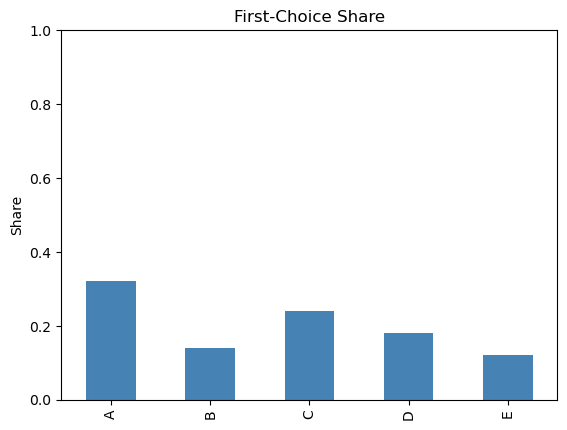

In [28]:
first_choice = (df_control == 1).sum()
(first_choice / len(df_control)).loc[option_names].plot(kind="bar", color="steelblue")
plt.ylabel("Share")
plt.title("First-Choice Share")
plt.ylim(0, 1)

In [29]:

# Create treatment data with matching column name and data type
treatment_data = SimulationExperimentEmpiricalValidator.read_empirical_data_from_dataframe(
    df=df,
    experimental_data_type="ordinal_ranking_per_agent",
    agent_id_column="name",
    value_column="Vote",
    agent_comments_column="justification",
    dataset_name="AI-enabled Story Telling Survey Simulation Results"
)

In [30]:
treatment_data

SimulationExperimentDataset(name='AI-enabled Story Telling Survey Simulation Results', description='Empirical data loaded from pandas DataFrame', key_results={'A_rank': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1], 'B_rank': [4, 4, 3, 3, 2, 3, 2, 3, 2, 4, 3, 2, 2, 4, 2, 3, 2, 4, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 4, 5, 4, 2, 3, 4, 4, 3, 2, 2, 3, 2, 3, 4, 3, 2, 3, 3], 'C_rank': [2, 3, 2, 2, 3, 2, 3, 2, 4, 3, 2, 3, 5, 2, 3, 4, 4, 2, 4, 2, 3, 4, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 1, 4, 4, 3, 2, 4, 5, 3, 2, 1, 2, 2, 2, 3, 2, 2], 'D_rank': [3, 2, 4, 5, 4, 5, 4, 4, 3, 2, 4, 4, 4, 5, 4, 2, 3, 3, 2, 4, 4, 2, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 4, 3, 3, 2, 1, 3, 2, 3, 4, 4, 4, 4, 3, 4, 4, 5, 4], 'E_rank': [5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5]}, result_types={'A_rank': 'per_agent', 'B_rank'

In [31]:
result_ttest = validate_simulation_experiment_empirically(
        control_data=control_data,
        treatment_data=treatment_data,
        validation_types=["statistical"],
        output_format="values"
    )

In [32]:
result_ttest.overall_score

0.5568872832606816

In [33]:
result_ttest.statistical_results

{'common_metrics': ['C_rank', 'B_rank', 'E_rank', 'A_rank', 'D_rank'],
 'test_results': {'treatment': {'C_rank': {'test_type': 'Welch t-test (unequal variance)',
    'control_mean': 2.54,
    'treatment_mean': 2.693877551020408,
    'mean_difference': 0.153877551020408,
    'percent_change': 6.058171300016063,
    't_statistic': -0.6821227240936516,
    'p_value': 0.49688647884470627,
    'confidence_interval': (-0.2941959049870052, 0.6019510070278212),
    'confidence_level': 0.95,
    'significant': False,
    'degrees_of_freedom': 91.39431732064256,
    'control_sample_size': 50,
    'treatment_sample_size': 49,
    'control_std': 1.265072394476026,
    'treatment_std': 0.9618576131773408,
    'effect_size': 0.1367452199676386},
   'B_rank': {'test_type': 'Welch t-test (unequal variance)',
    'control_mean': 3.96,
    'treatment_mean': 2.9183673469387754,
    'mean_difference': -1.0416326530612245,
    'percent_change': -26.30385487528345,
    't_statistic': 4.344604503157373,
    

In [34]:
result_ttest.semantic_results

In [35]:
result_ks = validate_simulation_experiment_empirically(
        control_data=control_data,
        treatment_data=treatment_data,
        validation_types=["statistical"],
        statistical_test_type="ks_test",
        output_format="values"
    )

In [36]:
result_ks.overall_score

0.6958858682382459

In [37]:
result_ks.statistical_results

{'common_metrics': ['C_rank', 'B_rank', 'E_rank', 'A_rank', 'D_rank'],
 'test_results': {'treatment': {'C_rank': {'test_type': 'Kolmogorov-Smirnov test',
    'control_mean': 2.54,
    'treatment_mean': 2.693877551020408,
    'control_median': 2.0,
    'treatment_median': 2.0,
    'control_std': 1.265072394476026,
    'treatment_std': 0.9618576131773408,
    'ks_statistic': 0.19918367346938776,
    'p_value': 0.21977452707629494,
    'significant': False,
    'control_sample_size': 50,
    'treatment_sample_size': 49,
    'effect_size': 0.19918367346938776,
    'overlap_coefficient': 0.6150296638101517,
    'percentile_differences': {'p25_diff': 0.0,
     'p50_diff': 0.0,
     'p75_diff': -0.75,
     'p90_diff': 0.0,
     'p95_diff': -1.0},
    'interpretation': 'No significant difference between distributions',
    'confidence_level': 0.95},
   'B_rank': {'test_type': 'Kolmogorov-Smirnov test',
    'control_mean': 3.96,
    'treatment_mean': 2.9183673469387754,
    'control_median': 5.

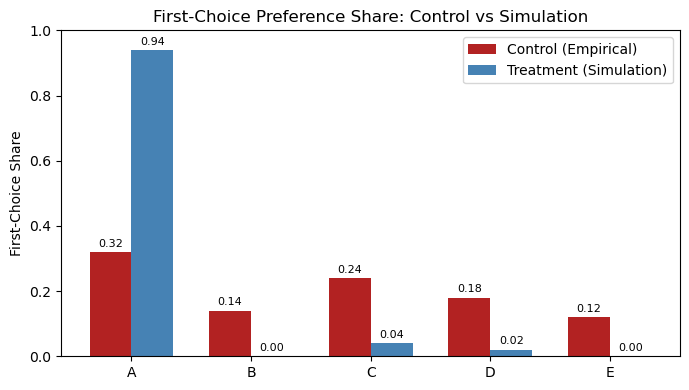

,Option,Control_FirstChoice,Treatment_FirstChoice
0,A,0.32,0.938776
1,B,0.14,0.000000
2,C,0.24,0.040816
3,D,0.18,0.020408
4,E,0.12,0.000000


In [38]:
# Compare first-choice (rank==1) shares between control (empirical) and treatment (simulation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dataset_to_rank_df(dataset):
    rank_cols = [k for k in dataset.key_results if k.endswith("_rank")]
    opts = [c.replace("_rank", "") for c in rank_cols]
    if not rank_cols:
        raise ValueError("Dataset has no *_rank columns to compute first choices.")
    return pd.DataFrame({opt: dataset.key_results[f"{opt}_rank"] for opt in opts}), opts

# Build rank DataFrames
control_rank_df, options_control = dataset_to_rank_df(control_data)
try:
    treatment_rank_df, options_treatment = dataset_to_rank_df(treatment_data)
except Exception as e:
    # Fallback: attempt to reconstruct from original df if simulation dataset lacks expanded ranks
    if 'df' in globals():
        # Expect a column with combined ranking like "A,B,C,D,E" or single numeric; skip if not matching
        raise e
    else:
        raise e

# Ensure same option ordering
options = [opt for opt in options_control if opt in options_treatment]

# Compute first-choice shares (rank == 1)
fc_control = (control_rank_df[options] == 1).sum() / len(control_rank_df)
fc_treatment = (treatment_rank_df[options] == 1).sum() / len(treatment_rank_df)

comparison = pd.DataFrame({
    'Option': options,
    'Control_FirstChoice': [fc_control[o] for o in options],
    'Treatment_FirstChoice': [fc_treatment[o] for o in options]
})

# Plot side-by-side bars
x = np.arange(len(options))
width = 0.35
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(x - width/2, comparison['Control_FirstChoice'], width, label='Control (Empirical)', color='firebrick')
ax.bar(x + width/2, comparison['Treatment_FirstChoice'], width, label='Treatment (Simulation)', color='steelblue')
ax.set_xticks(x)
ax.set_xticklabels(options)
ax.set_ylabel('First-Choice Share')
ax.set_ylim(0, 1)
ax.set_title('First-Choice Preference Share: Control vs Simulation')

for i, val in enumerate(comparison['Control_FirstChoice']):
    ax.text(x[i] - width/2, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=8)
for i, val in enumerate(comparison['Treatment_FirstChoice']):
    ax.text(x[i] + width/2, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=8)

ax.legend()
plt.tight_layout()
plt.show()

comparison

## Borda Count Comparison
This section computes Borda scores (higher is better) for each option in the empirical control data vs the simulation treatment data. Rank 1 gets the maximum points (N-1), rank N gets 0. We also show normalized scores (0-1) and the difference.

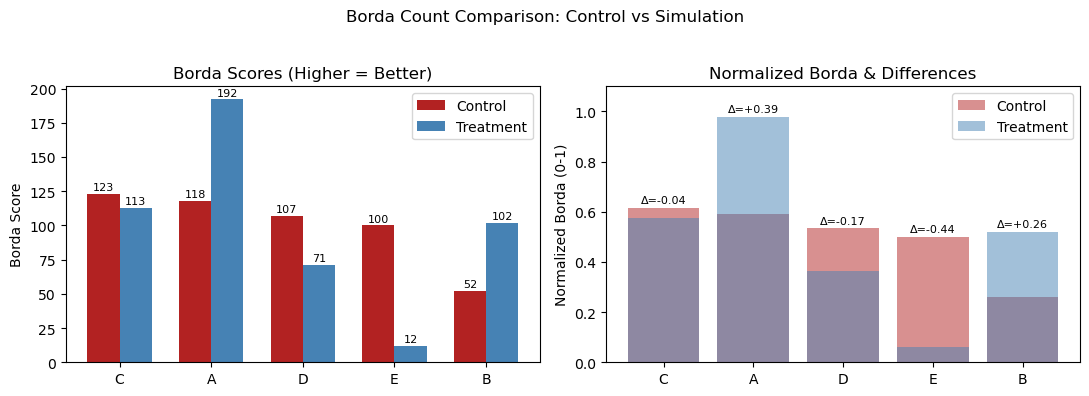

,Option,Control_Borda,Treatment_Borda,Control_Borda_Norm,Treatment_Borda_Norm,Norm_Diff
2,C,123,113,0.615,0.576531,-0.038469
0,A,118,192,0.590,0.979592,0.389592
3,D,107,71,0.535,0.362245,-0.172755
4,E,100,12,0.500,0.061224,-0.438776
1,B,52,102,0.260,0.520408,0.260408


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse existing rank DataFrames: control_rank_df, treatment_rank_df, and options list
# Points scheme: with K options, rank 1 -> K-1 points, rank K -> 0 points
K = len(options)
points = {r: (K - r) for r in range(1, K+1)}

borda_control = control_rank_df[options].replace(points).sum()
borda_treatment = treatment_rank_df[options].replace(points).sum()

# Normalize (divide by max possible = (K-1) * number_of_respondents)
max_points_control = (K-1) * len(control_rank_df)
max_points_treatment = (K-1) * len(treatment_rank_df)

borda_control_norm = borda_control / max_points_control
borda_treatment_norm = borda_treatment / max_points_treatment

borda_df = pd.DataFrame({
    'Option': options,
    'Control_Borda': borda_control.values,
    'Treatment_Borda': borda_treatment.values,
    'Control_Borda_Norm': borda_control_norm.values,
    'Treatment_Borda_Norm': borda_treatment_norm.values,
})

borda_df['Norm_Diff'] = borda_df['Treatment_Borda_Norm'] - borda_df['Control_Borda_Norm']

# Order by control Borda descending for consistency
borda_df = borda_df.sort_values('Control_Borda', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(11,4))
# Absolute Borda scores
x = np.arange(len(borda_df))
width = 0.35
axes[0].bar(x - width/2, borda_df['Control_Borda'], width, label='Control', color='firebrick')
axes[0].bar(x + width/2, borda_df['Treatment_Borda'], width, label='Treatment', color='steelblue')
axes[0].set_xticks(x)
axes[0].set_xticklabels(borda_df['Option'])
axes[0].set_ylabel('Borda Score')
axes[0].set_title('Borda Scores (Higher = Better)')
axes[0].legend()
for i, v in enumerate(borda_df['Control_Borda']):
    axes[0].text(i - width/2, v + max(borda_df['Control_Borda'])*0.01, f"{int(v)}", ha='center', va='bottom', fontsize=8)
for i, v in enumerate(borda_df['Treatment_Borda']):
    axes[0].text(i + width/2, v + max(borda_df['Control_Borda'])*0.01, f"{int(v)}", ha='center', va='bottom', fontsize=8)

# Normalized difference plot
axes[1].bar(borda_df['Option'], borda_df['Control_Borda_Norm'], alpha=0.5, label='Control', color='firebrick')
axes[1].bar(borda_df['Option'], borda_df['Treatment_Borda_Norm'], alpha=0.5, label='Treatment', color='steelblue')
for i, opt in enumerate(borda_df['Option']):
    c_val = borda_df.iloc[i]['Control_Borda_Norm']
    t_val = borda_df.iloc[i]['Treatment_Borda_Norm']
    axes[1].text(i, max(c_val, t_val) + 0.01, f"Δ={t_val - c_val:+.02f}", ha='center', va='bottom', fontsize=8)
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel('Normalized Borda (0-1)')
axes[1].set_title('Normalized Borda & Differences')
axes[1].legend()

plt.suptitle('Borda Count Comparison: Control vs Simulation')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

borda_df